# __Exploring and Analyzing LendingClub Approved Loan Data__: <br><br> _A Case Study for Predicting Loan Grades and Loan Status_

___ by Alan Kuang, Ali Taheri, Arda Ugur<br><br />
University of the Pacific, School of Engineering and Computer Science<br />
Data Science Graduate Program___<br><br />
<a_ugur1@u.pacific.edu>, <a_kuang1@u.pacific.edu>, <s_taheritari@u.pacific.edu><br />
<br />
___February 2018___

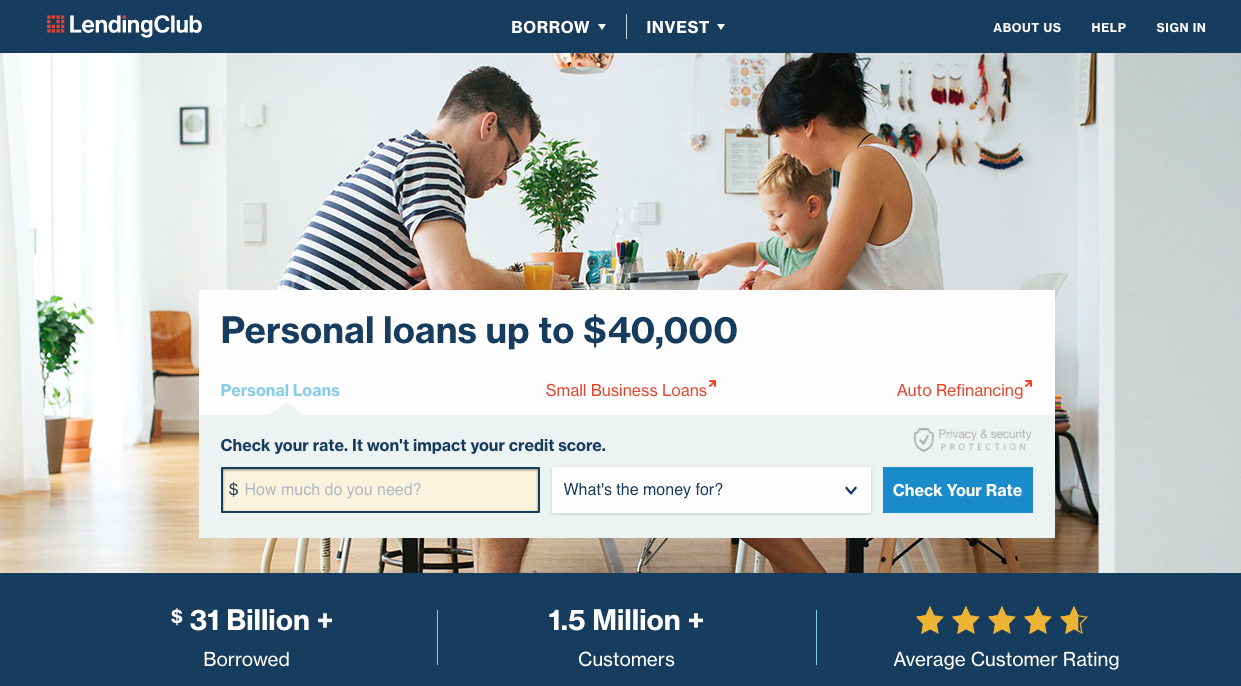

## 1. Introduction

The principal goal of this study is to present a __data visualization__ case study using using [Lending Club](https://www.lendingclub.com) approved loan data from 2012 to 2017 Q3. 
<br><br>
While doing so, we decided to work with __full data science project life cycle__ in mind, from data cleaning to exploratory data analysis and data visualization, from feature selection to predictive analytics and machine learning. 

In [314]:
# FILL THIS PART WITH MENTIONING ALAN AND ALI'S WORKS

## 2. Data Source

As stated above, we are going to build our case study using the Lending Club financial data, which is made publicly available by LendingClub in `.csv` format, spanning over ten years, from June-2007 to September-2017, inclusive. However, within the scope of this project we will be working with data from 2012 to 2017 Q3. Additionally, there is also a __Data Dictionary__ in `.xlsx` format, provided by Lending Club which contains the column names (__data attributes__) and explanations on each data attributes.
<br><br>
The Lending Club's financial loan data can be access from the following link:
<br><br>
https://www.lendingclub.com/info/download-data.action

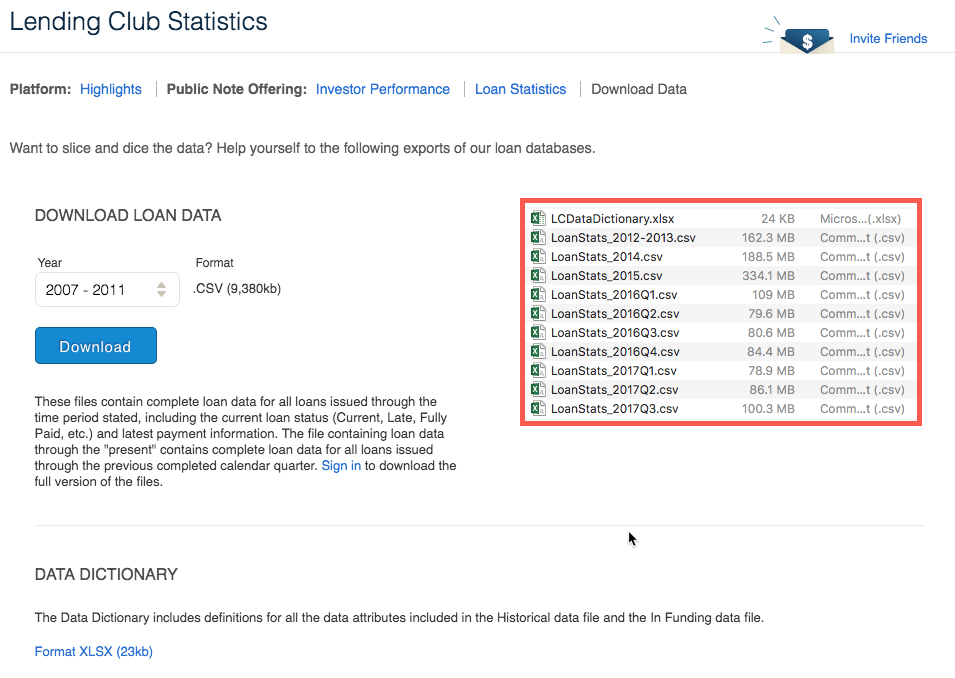

## 3. Business Case - Lending Club and Peer-to-Peer Lending Model

### What is Peer-to-Peer Lending?

In order to understand the nature of business problem at hand and its proposed solution, it is appropriate to introduce the basics of __peer-to-peer lending__ which constitutes the basis of Lending Club business model. 
<br><br>
Peer-to-peer lending (also abbreviated as __P2P lending__) can be defined as the form of lending funds to individuals or businesses without the use of traditional financial insittutions (e.g., banks, credit unions). In this day and age, with the exponential growth of internet technologies and online social networks, the concept of P2P lending has been offered as an online service which matches borrowers with lenders. Since P2P lending services are mostly offered by companies mostly operate online, they can run with lower overhead and provide consumer credits cheaper than conventional financial institutions. Consequently, while consumers can borrow funds at much lower interest rates, lenders can earn higher returns on their investments compared to similar investment instruments offered by banks. The interest rates can be set by lenders who compete for the lowest rate on the reverse auction model on the basis of an analysis of the potential borrower's __creditworthiness__. However, most P2P loans are not collateralized and simply unsecured personal loans, which carries the risk of the borrower __defaulting__ on the loan taken out. In other words, the lender's investment in the loan is not protected by any government guarantee. Therefore, lenders usually aim to reduce the risk of default by choosing which borrowers to lend to, and mitigate total risk by diversifying their investments among different borrowers.

### How Does Peer-to-Peer Lending Work at Lending Club?

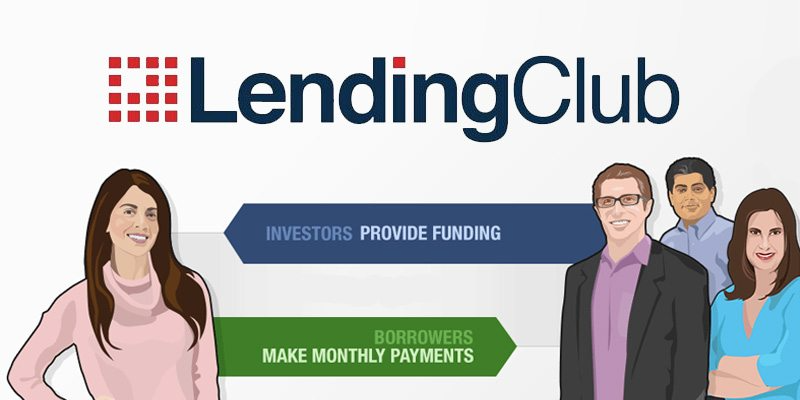

In this section, we are going to summarize the lending and borrowing process at Lending Club marketplace.As part of the application process, individuals who wish to borrow funds at Lending Club completes a comprehensive application package, providing detailed information regarding their financial history, such as annual income, current debt-to-income ratio, current credit line, home ownership, employement history, reason(s) for the requested loan, (if any) records of delinquencies and bankruptcies. Based on the information provided, Lending Club evaluates each applicant's creditworthiness, and determines a specific __interest rate__ for the requested loan amount.  
<br>
Usually, higher interest rate for any given loan amount equates to a riskier borrower who is more likely to default. Likewise, a lower interest rate equates to a borrower with a better credit history who is less likely to default and more likely to pay back the loan. 
<br>
The interest rates at Lending Club range from 5.32% to 30.99% and each borrower is assigned a __loan grade__ according to the interest rate determined for the loan amount he/she requested. If the borrower accepts the offered interest rate, then the loan is listed on the Lending Club marketplace.
<br><br>
Once a loan is approved and listed on the Lending Club marketplace, qualified investors can browse and view them along with the borrowers creditworthiness, and all of the information provided by the borrower regarding their financial history, without seeing their identity. And once an investor decides to back a loan, they choose the amount of money they wish to fund. Once a loan's requested amount is fully funded (usually by more than one investor), the borrower receieves the money they requested, less the __origination fee__ charged by the Lending Club. 
<br><br>
In return for the dispensed lump sum of money, the borrower makes montly payments back to Lending Club, over the course of either 36-months or 60-months. As the last step of the crowdlending process, Lending Club redistributes these monthly payments back to the investors who backed the loan in question. If the borrower fully pays off the loan on time, the investors makes a profit which from their allocated capital which corresponds to the interest amount paid by the borrower (in addition to the principal loan amount paid back by the borrower). 
<br><br>
The simple diagram below illustrates the lending and borrowing process, summarized above.

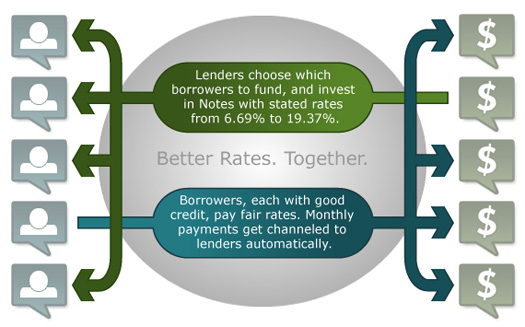

### Problem Definition and Objective

As mentioned earlier, credit modelling is primarily preoccupied with the problem of assessing and mitigating counterparty default risk using sophisticated quatitative models and methods. That being stated, Lending Club (or any P2P lending platform for that matter) has to be very careful and rigorous in their credit modelling and with regards to determining which borrowers are more likely to default (_or which loans are more likely to be paid off_). 
<br><br>
Nonetheless, most investors, if they are convinced that a borrower can pay back the loan despite his/her poor historical financial performance, they may still want to back loans with higher interest rates (eventhough higher interest rate equates to higher risk), simply because higher interest rate (therefore higher risk) means higher return on the investment made. 
<br><br>
In order to reduce and mitigate the total risk, most investors build portfolios based on quantitatively optimized portfolio strategies (e.g., [Efficient Frontier](https://en.wikipedia.org/wiki/Efficient_frontier), and [Modern Portfolio Theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory)), thus investing in multiple loans with optimized combinations of low, medium, and high risk loans. 
<br><br>
In this project, we are going to focus on building applied predictive models using 

## 4. Python Configuration

Before we start importing and cleaning our raw data sets, it is a good programming practice to start with configuring our Python instance. 

In [1]:
# Import necessary packages
#
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
style.use('fivethirtyeight')
#
import seaborn as sns
#
import sklearn.metrics as skm
#
from pandas import DataFrame, Series
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
#
# Pandas settings
#
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#
%matplotlib inline  
#
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
#
import warnings
warnings.filterwarnings('ignore')

/Users/ardaugur/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/ardaugur/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 5. Importing Raw Data

In [2]:
# Import raw data from .csv files
#
# Skip the first line of each file as it contains unnecessary text instead of the column/attribute names
# Otherwise, this first line would prevent the data to be parsed into pandas data frame properly
#
#
# Please note that we renamed LendingClub data files LoanStats3b.csv as LoanStats_2012-2013.csv
#                                                    LoanStats3c.csv as LoanStats_2014.csv
#                                                    LoanStats3d.csv as LoanStats_2015.csv
# Data 2012 to 2013
# There was no individual files for 2012 and 2013, thus we will process this combined file
#
d01 = DataFrame(pd.read_csv('LoanStats_2012-2013.csv', skiprows=1, low_memory=False))
#
# Data 2014
#
d02 = DataFrame(pd.read_csv('LoanStats_2014.csv', skiprows=1, low_memory=False))
#
# Data 2015
#
d03 = DataFrame(pd.read_csv('LoanStats_2015.csv', skiprows=1, low_memory=False))
#
# Data 2016 
d04 = DataFrame(pd.read_csv('LoanStats_2016Q1.csv', skiprows=1, low_memory=False))
d05 = DataFrame(pd.read_csv('LoanStats_2016Q2.csv', skiprows=1, low_memory=False))
d06 = DataFrame(pd.read_csv('LoanStats_2016Q3.csv', skiprows=1, low_memory=False))
d07 = DataFrame(pd.read_csv('LoanStats_2016Q4.csv', skiprows=1, low_memory=False))
# Data 2017
d08 = DataFrame(pd.read_csv('LoanStats_2017Q1.csv', skiprows=1, low_memory=False))
d09 = DataFrame(pd.read_csv('LoanStats_2017Q2.csv', skiprows=1, low_memory=False))
d10 = DataFrame(pd.read_csv('LoanStats_2017Q3.csv', skiprows=1, low_memory=False))

In [3]:
# Combine individual data frames into a single data frame
#
loans_raw = pd.concat([d01, d02, d03, d04, d05, d06, d07, d08, d09, d10])

In [4]:
# Save combined raw data into one single csv file
#
loans_raw.to_csv("lc_loans_raw.csv", index = False)

In [5]:
# Let us change the data frame name for easy reading
#
loans = loans_raw

In [6]:
# Check dimensions of loans data frame
#
print("The dimensions of 'loans' data frame is:", loans.shape)

The dimensions of 'loans' data frame is: (1604263, 145)


In [7]:
# First 10 rows of our raw data
#
loans.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    12000.0      12000.0          12000.0   36 months   
1  NaN        NaN    14000.0      14000.0          14000.0   36 months   
2  NaN        NaN    15000.0      15000.0          15000.0   36 months   
3  NaN        NaN    24000.0      24000.0          24000.0   36 months   
4  NaN        NaN    28000.0      28000.0          28000.0   36 months   
5  NaN        NaN    11500.0      11500.0          11500.0   60 months   
6  NaN        NaN    27050.0      27050.0          27050.0   36 months   
7  NaN        NaN    12000.0      12000.0          12000.0   36 months   
8  NaN        NaN    12000.0      12000.0          12000.0   36 months   
9  NaN        NaN    20800.0      20800.0          20800.0   36 months   

  int_rate  installment grade sub_grade                             emp_title  \
0   13.53%       407.40     B        B5                       On road manager   
1   12.85%       470.71     B        B4  Assistant Director - Human Resources   
2    8.90%       476.30     A        A5         aircraft maintenance engineer   
3   13.53%       814.80     B        B5                                driver   
4    7.62%       872.52     A        A3                    Area Sales Manager   
5   22.90%       323.54     E        E4                             Secretary   
6   10.99%       885.46     B        B2   Team Leadern Customer Ops & Systems   
7   10.99%       392.81     B        B2                       Project Manager   
8   11.99%       398.52     B        B3                                   LTC   
9   13.53%       706.16     B        B5                    Operations Manager   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years           RENT     40000.0     Source Verified  Dec-2013   
1    4 years           RENT     88000.0        Not Verified  Dec-2013   
2    2 years       MORTGAGE     63000.0        Not Verified  Dec-2013   
3  10+ years       MORTGAGE    100000.0            Verified  Dec-2013   
4    5 years       MORTGAGE    325000.0     Source Verified  Dec-2013   
5    4 years           RENT     32760.0            Verified  Dec-2013   
6  10+ years            OWN     55000.0            Verified  Dec-2013   
7    4 years           RENT     60000.0        Not Verified  Dec-2013   
8  10+ years       MORTGAGE    130000.0     Source Verified  Dec-2013   
9  10+ years           RENT     81500.0            Verified  Dec-2013   

  loan_status pymnt_plan  url  \
0  Fully Paid          n  NaN   
1  Fully Paid          n  NaN   
2  Fully Paid          n  NaN   
3  Fully Paid          n  NaN   
4  Fully Paid          n  NaN   
5  Fully Paid          n  NaN   
6  Fully Paid          n  NaN   
7  Fully Paid          n  NaN   
8  Fully Paid          n  NaN   
9  Fully Paid          n  NaN   

                                                desc             purpose  \
0                                                NaN  debt_consolidation   
1                                                NaN  debt_consolidation   
2    Borrower added on 12/31/13 > To pay Home Dep...  debt_consolidation   
3    Borrower added on 12/31/13 > pay off my othe...         credit_card   
4                                                NaN  debt_consolidation   
5    Borrower added on 12/31/13 > This loan is fo...  debt_consolidation   
6    Borrower added on 12/31/13 > Combining high ...  debt_consolidation   
7    Borrower added on 12/31/13 > I would like to...  debt_consolidation   
8                                                NaN  debt_consolidation   
9    Borrower added on 12/31/13 > My goal is to p...  debt_consolidation   

                            title zip_code addr_state    dti  delinq_2yrs  \
0              Debt consolidation    871xx         NM  16.94          0.0   
1              Debt consolidation    282xx         NC  10.02          1.0   
2                         Pay off    334xx         FL  16.51 

In [8]:
# Last 10 rows of our raw data
#
loans.tail(10)

id  member_id  \
122693                                               NaN        NaN   
122694                                               NaN        NaN   
122695                                               NaN        NaN   
122696                                               NaN        NaN   
122697                                               NaN        NaN   
122698                                               NaN        NaN   
122699                                               NaN        NaN   
122700                                               NaN        NaN   
122701  Total amount funded in policy code 1: 1791201400        NaN   
122702   Total amount funded in policy code 2: 651669342        NaN   

        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
122693    17000.0      17000.0          17000.0   36 months   30.99%   
122694    30000.0      30000.0          30000.0   60 months   30.89%   
122695    14400.0      14400.0          14400.0   60 months   30.17%   
122696     6000.0       6000.0           6000.0   36 months   23.88%   
122697    20000.0      20000.0          20000.0   60 months   26.30%   
122698    35000.0      35000.0          35000.0   60 months   30.89%   
122699    30775.0      30775.0          30525.0   60 months   30.65%   
122700    18900.0      18900.0          18900.0   60 months   30.94%   
122701        NaN          NaN              NaN         NaN      NaN   
122702        NaN          NaN              NaN         NaN      NaN   

        installment grade sub_grade                                 emp_title  \
122693       730.93     G        G5  Juvenile Intake Probation Department Hea   
122694       987.07     G        G3                                   Manager   
122695       467.40     F        F3                           Project Manager   
122696       235.02     E        E2                                       NaN   
122697       602.37     E        E5                                       NaN   
122698      1151.58     G        G3                           Service Foremsn   
122699      1008.00     F        F4                   GENERAL SUPERINTENDENT    
122700       622.44     G        G4                                   Teacher   
122701          NaN   NaN       NaN                                       NaN   
122702          NaN   NaN       NaN                                       NaN   

       emp_length home_ownership  annual_inc verification_status   issue_d  \
122693  10+ years       MORTGAGE     60051.0            Verified  Jul-2017   
122694    2 years           RENT     80000.0            Verified  Jul-2017   
122695    9 years           RENT     87000.0            Verified  Jul-2017   
122696        n/a       MORTGAGE     40000.0            Verified  Jul-2017   
122697        n/a       MORTGAGE     52000.0        Not Verified  Jul-2017   
122698    4 years           RENT     75000.0     Source Verified  Jul-2017   
122699     1 year           RENT    105000.0     Source Verified  Jul-2017   
122700     1 year           RENT     45000.0            Verified  Jul-2017   
122701        NaN            NaN         NaN                 NaN       NaN   
122702        NaN            NaN         NaN                 NaN       NaN   

               loan_status pymnt_plan  url desc             purpose  \
122693  Late (31-120 days)          n  NaN  NaN  debt_consolidation   
122694             Current          n  NaN  NaN  debt_consolidation   
122695             Current          n  NaN  NaN                 car   
122696             Current          n  NaN  NaN  debt_consolidation   
122697             Current          n  NaN  NaN    home_improvement   
122698          Fully Paid          n  NaN  NaN  debt_consolidation   
122699  Late (31-120 days)          n  NaN  NaN  debt_consolidation   
122700             Current          n  NaN  NaN             medical   
122701                 NaN        NaN  NaN  NaN                 NaN   
122702            

As we can see from the .head(10) and .tail(10) cross-sections of our raw data, there are significant amount of missing data points in our data set. Before proceeding with descriptive analytics and data visualization steps, we need to remove rows and columns with missing data points from our raw data set. This is also a necessary step for feature selection.

## 6. Data Clean-Up - Part I

In [9]:
# Let us import data dictionary file
# We are going to call this file "data_attributes"
#
data_attributes = pd.read_excel('LCDataDictionary.xlsx')

In [10]:
# We know that the data dictionary file has two columns named as "LoansStatNew" and "Description"
# We are now going change these column names for better readability
#
data_attributes = data_attributes.rename(columns={'LoanStatNew': 'Data Attribute',
                                                 'Description': 'Attribute Description'})

In [11]:
data_attributes

Data Attribute  \
0                                acc_now_delinq   
1                          acc_open_past_24mths   
2                                    addr_state   
3                                      all_util   
4                                    annual_inc   
5                              annual_inc_joint   
6                              application_type   
7                                   avg_cur_bal   
8                                bc_open_to_buy   
9                                       bc_util   
10                     chargeoff_within_12_mths   
11                      collection_recovery_fee   
12                   collections_12_mths_ex_med   
13                                  delinq_2yrs   
14                                  delinq_amnt   
15                                         desc   
16                                          dti   
17                                    dti_joint   
18                             earliest_cr_line   
19                                   emp_length   
20                                    emp_title   
21                              fico_range_high   
22                               fico_range_low   
23                                  funded_amnt   
24                              funded_amnt_inv   
25                                        grade   
26                               home_ownership   
27                                           id   
28                                      il_util   
29                          initial_list_status   
30                                       inq_fi   
31                                 inq_last_12m   
32                               inq_last_6mths   
33                                  installment   
34                                     int_rate   
35                                      issue_d   
36                           last_credit_pull_d   
37                         last_fico_range_high   
38                          last_fico_range_low   
39                              last_pymnt_amnt   
40                                 last_pymnt_d   
41                                    loan_amnt   
42                                  loan_status   
43                                   max_bal_bc   
44                                    member_id   
45                           mo_sin_old_il_acct   
46                         mo_sin_old_rev_tl_op   
47                        mo_sin_rcnt_rev_tl_op   
48                               mo_sin_rcnt_tl   
49                                     mort_acc   
..                                          ...   
103                                 total_cu_tl   
104                  total_il_high_credit_limit   
105                                 total_pymnt   
106                             total_pymnt_inv   
107                               total_rec_int   
108                          total_rec_late_fee   
109                             total_rec_prncp   
110                          total_rev_hi_lim     
111                                         url   
112                         verification_status   
113                       verified_status_joint   
114                                    zip_code   
115                            revol_bal_joint    
116                     sec_app_fico_range_low    
117                    sec_app_fico_range_high    
118                   sec_app_earliest_cr_line    
119                     sec_app_inq_last_6mths    
120                           sec_app_mort_acc    
121                           sec_app_open_acc    
122                         sec_app_revol_util    
123                         sec_app_open_act_il   
124                      sec_app_num_rev_accts    
125           sec_app_chargeoff_within_12_mths    
126         sec_app_collections_12_mths_ex_med    
127        sec_app_mths_since_last_major_derog    
128                               hardship_flag   
129                               hardship_type   
130 

In [12]:
# Investigate data types with data attributes dictionary
#
loans_data_types = pd.DataFrame(loans.dtypes,columns=['Data Type'])
loans_data_types = loans_data_types.reset_index()
loans_data_types['Data Attribute'] = loans_data_types['index']
loans_data_types = loans_data_types[['Data Attribute','Data Type']]
#
loans_data_types['First Value'] = loans.iloc[0].values
#
loans_data_info = loans_data_types.merge(data_attributes, on='Data Attribute',how='left')

In [13]:
# Print our newly created loans data info data frame
#
loans_data_info

Data Attribute Data Type         First Value  \
0                                            id    object                 NaN   
1                                     member_id   float64                 NaN   
2                                     loan_amnt   float64               12000   
3                                   funded_amnt   float64               12000   
4                               funded_amnt_inv   float64               12000   
5                                          term    object           36 months   
6                                      int_rate    object              13.53%   
7                                   installment   float64               407.4   
8                                         grade    object                   B   
9                                     sub_grade    object                  B5   
10                                    emp_title    object     On road manager   
11                                   emp_length    object           10+ years   
12                               home_ownership    object                RENT   
13                                   annual_inc   float64               40000   
14                          verification_status    object     Source Verified   
15                                      issue_d    object            Dec-2013   
16                                  loan_status    object          Fully Paid   
17                                   pymnt_plan    object                   n   
18                                          url   float64                 NaN   
19                                         desc    object                 NaN   
20                                      purpose    object  debt_consolidation   
21                                        title    object  Debt consolidation   
22                                     zip_code    object               871xx   
23                                   addr_state    object                  NM   
24                                          dti   float64               16.94   
25                                  delinq_2yrs   float64                   0   
26                             earliest_cr_line    object            Oct-1998   
27                               inq_last_6mths   float64                   0   
28                       mths_since_last_delinq   float64                  53   
29                       mths_since_last_record   float64                  33   
30                                     open_acc   float64                   7   
31                                      pub_rec   float64                   2   
32                                    revol_bal   float64                5572   
33                                   revol_util    object               68.8%   
34                                    total_acc   float64                  32   
35                          initial_list_status    object                   w   
36                                    out_prncp   float64                   0   
37                                out_prncp_inv   float64                   0   
38                                  total_pymnt   float64             13359.8   
39                              total_pymnt_inv   float64             13359.8   
40                              total_rec_prncp   float64               12000   
41                                total_rec_int   float64             1359.78   
42                           total_rec_late_fee   float64                   0   
43                                   recoveries   float64                   0   
44                      collection_recovery_fee   float64                   0   
45                                 last_pymnt_d    object            Sep-2015   
46                              last_pymnt_amnt   float64              119.17   
47                                 next_pymnt_d    object                 NaN   
48                           last_credit_pull_d    object       

In [14]:
# Loan id column is all null so let us update it with integers and set this column as the index column
#
loans.loc[loans['id'].isnull(), 'id'] = loans.loc[loans['id'].isnull()].index

In [15]:
# First let us convert loan issue date - string date to date object
#
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [16]:
# Now let us parse loan requested date for increased granularity
# This is going to help us with our data visualization tasks ahead
#
loans['month']= loans['issue_d'].dt.month
loans['year']= loans['issue_d'].dt.year

In [17]:
loans[['issue_d', 'month', 'year']].head()

issue_d  month    year
0 2013-12-01   12.0  2013.0
1 2013-12-01   12.0  2013.0
2 2013-12-01   12.0  2013.0
3 2013-12-01   12.0  2013.0
4 2013-12-01   12.0  2013.0

In [18]:
# Choose and re-arrange data by subsetting the columns
#
loans = loans[['id','issue_d','year', 'month', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'application_type',
                             'annual_inc', 'dti', 'annual_inc_joint', 'dti_joint',
                             'revol_util', 'home_ownership', 'verification_status', 'addr_state', 'purpose', 
                             'loan_status']]

In [19]:
# Combination of joint and individual loans
#
loans['annual_inc']=np.where(loans['application_type'] == 'Joint App' , loans['annual_inc_joint'] ,loans['annual_inc'])
#
loans['dti']=np.where(loans['application_type'] == 'Joint App', loans['dti_joint'],loans['dti'])
#
loans.drop(['annual_inc_joint','dti_joint'], axis=1,inplace= True)

In [20]:
# Change the interest rate from object to float
#
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')

In [21]:
# Let us set display format for our floating numbers before beginning analyses
#
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [22]:
# Change numerical values from object to float
#
loans['annual_inc'] = loans['annual_inc'].astype('float')
loans['dti'] = loans['dti'].astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%')

## 7. Exploratory Data Analysis

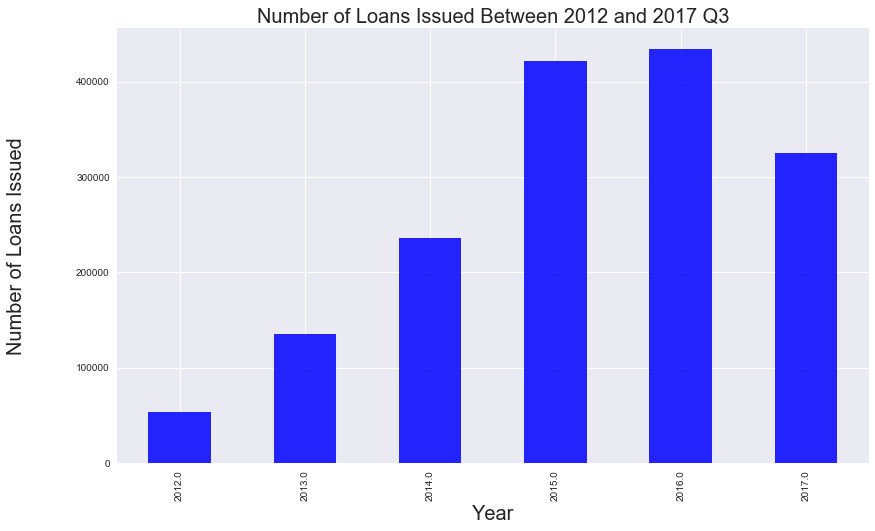

In [38]:
# Number of loans issued by year
#
n_loans = loans.groupby(loans.year)['id'].count()
#
n_loans.plot(kind='bar', alpha=0.85, color='blue', figsize=(12,8))
plt.title("Number of Loans Issued Between 2012 and 2017 Q3", fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel("Number of Loans Issued", fontsize=20, labelpad = 50)
#


In [236]:
# Descriptive statistics for loan amounts issued over time
#
loans['loan_amnt'].describe()

count   1604243.00
mean      14829.92
std        8817.18
min        1000.00
25%        8000.00
50%       12800.00
75%       20000.00
max       40000.00
Name: loan_amnt, dtype: float64

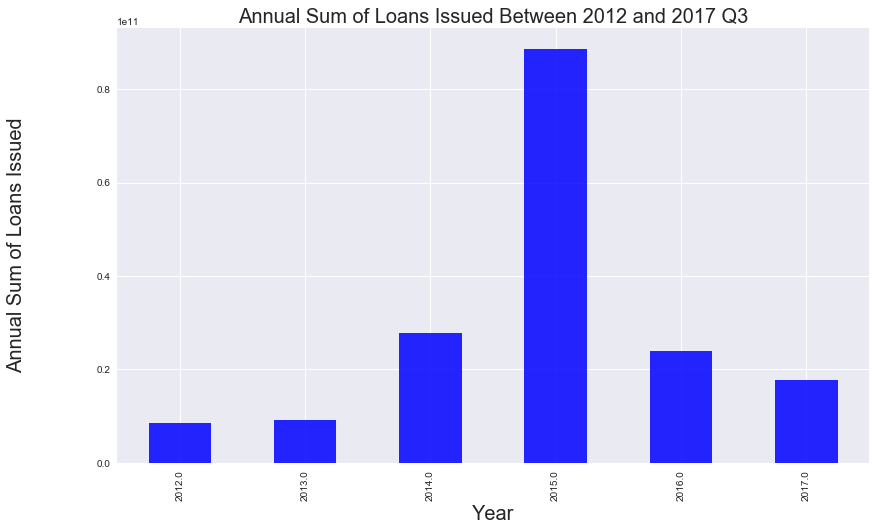

In [40]:
# Number of loans issued by year
#
n_loans = loans.groupby(loans.year)['id'].sum()
#
n_loans.plot(kind='bar', alpha=0.85, color='blue', figsize=(12,8))
plt.title("Annual Sum of Loans Issued Between 2012 and 2017 Q3", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Annual Sum of Loans Issued", fontsize = 20, labelpad = 70)

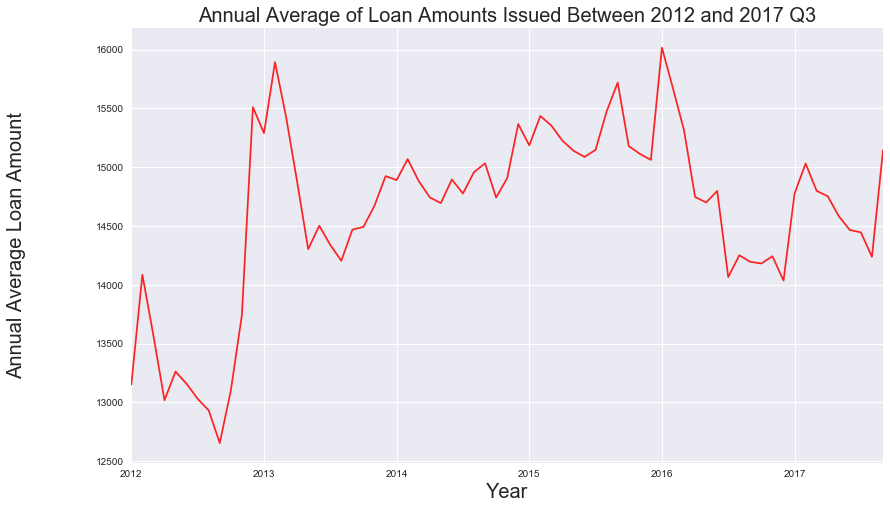

In [41]:
# Average Loan Amount Over Time
#
avg_loan = loans.groupby(loans.issue_d)['loan_amnt'].mean()
#
avg_loan.plot(kind='line', alpha=0.85, color='red', figsize=(12,8))
plt.title("Annual Average of Loan Amounts Issued Between 2012 and 2017 Q3", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Annual Average Loan Amount", fontsize = 20, labelpad = 70)

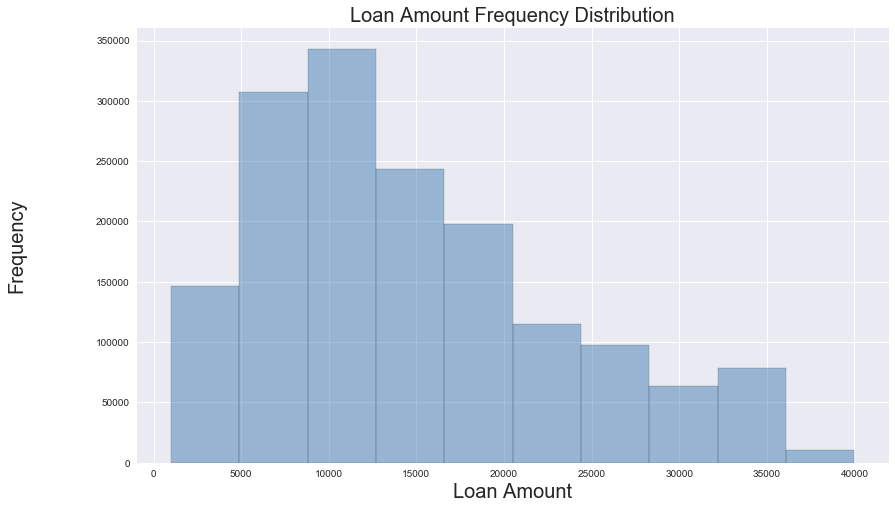

In [43]:
# Loan Amount Distribution Histogram
#
loans['loan_amnt'].plot.hist(alpha=0.50, color='steelblue', edgecolor='black',figsize=(12,8))
#
plt.title('Loan Amount Frequency Distribution', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20, labelpad = 70)
plt.xlabel('Loan Amount', fontsize = 20)

In [44]:
# Descriptive statistics for loan amounts based on loan grades
#
loans.groupby(loans.grade)['loan_amnt'].describe()

count     mean     std     min      25%      50%      75%      max
grade                                                                       
A     262541.00 14241.36 8205.71 1000.00  8000.00 12000.00 20000.00 40000.00
B     472971.00 13580.43 8291.41 1000.00  7200.00 12000.00 18000.00 40000.00
C     482044.00 14778.45 8931.82 1000.00  8000.00 12675.00 20000.00 40000.00
D     231496.00 15765.08 9213.92 1000.00  8725.00 14400.00 21300.00 40000.00
E     108567.00 17939.76 9312.51 1000.00 10800.00 16575.00 25000.00 40000.00
F      36110.00 19166.43 9211.61 1000.00 12000.00 18200.00 26000.00 40000.00
G      10514.00 20498.61 8919.08 1000.00 13250.00 19750.00 28000.00 40000.00

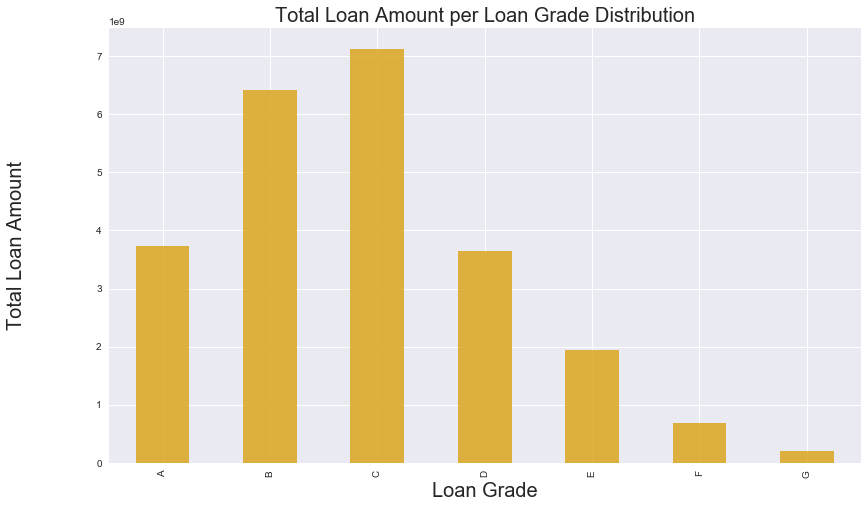

In [46]:
# Loan Amounts Distribution per Loan Grade
#
loan_per_grade = loans.groupby('grade')['loan_amnt'].sum().sort_index()
loan_per_grade.plot(kind='bar', alpha=0.85, color='goldenrod', figsize=(12,8))
plt.title('Total Loan Amount per Loan Grade Distribution', fontsize = 20)
plt.xlabel('Loan Grade', fontsize = 20)
plt.ylabel('Total Loan Amount', fontsize = 20, labelpad = 70)

In [47]:
# Descriptive statistics for interest rates
#
loans['int_rate'].describe()

count   1604243.00
mean         13.25
std           4.72
min           5.32
25%           9.76
50%          12.74
75%          15.99
max          30.99
Name: int_rate, dtype: float64

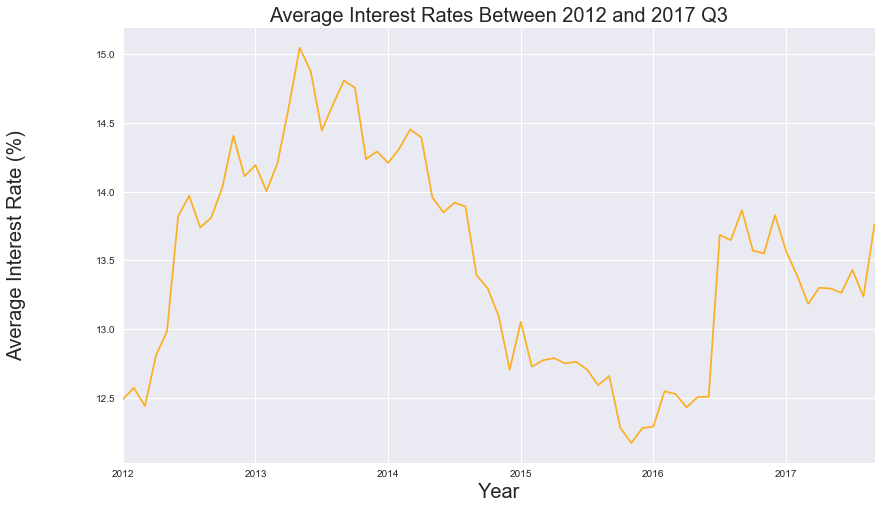

In [48]:
# Average Interest Rates Over Time
#
avg_rate = loans.groupby(loans.issue_d)['int_rate'].mean()
#
avg_rate.plot(kind='line', alpha=0.85, color='orange', figsize=(12,8))
plt.title("Average Interest Rates Between 2012 and 2017 Q3", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Average Interest Rate (%)", fontsize = 20, labelpad = 70)

In [49]:
# Descriptive statistics for issued loan grades
#
loans.groupby(loans.grade)['grade'].count()

grade
A    262541
B    472971
C    482044
D    231496
E    108567
F     36110
G     10514
Name: grade, dtype: int64

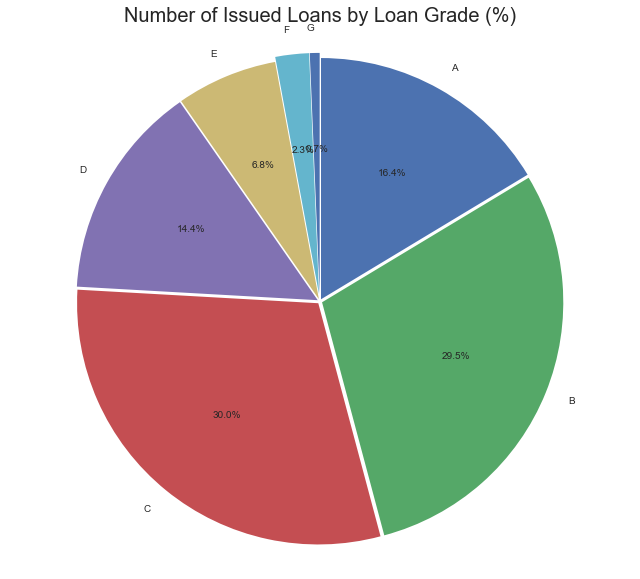

In [52]:
# Pie chart for loan grades - slices will be ordered and plotted counter-clockwise
#
fig, axs = plt.subplots(1, figsize=(10,10))
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sizes = loans.groupby(loans.grade)['id'].count()
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03)
#
plt.title('Number of Issued Loans by Loan Grade (%)', fontsize = 20)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=False, counterclock=False,startangle=90, 
        center=(0,0))
# 
plt.axis('equal')
#
plt.show()

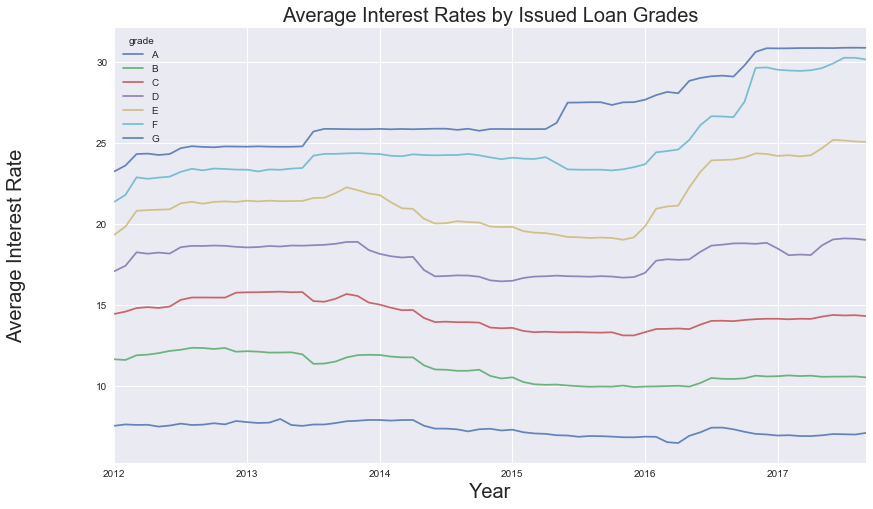

In [56]:
# Distribution of average interest rates by loan grades over time
#
avg_rate_by_grade = loans.groupby(['issue_d', 'grade'])['int_rate'].mean().unstack()
#
avg_rate_by_grade.plot(kind='line', alpha=0.85, figsize=(12,8))
#
plt.title('Average Interest Rates by Issued Loan Grades', fontsize = 20)
plt.ylabel('Average Interest Rate', fontsize = 20, labelpad = 70)
plt.xlabel('Year', fontsize = 20)

In [57]:
# Descriptive statistics for interest rates based on loan grades
#
loans.groupby(loans.grade)['int_rate'].describe()

count  mean  std  min   25%   50%   75%   max
grade                                                  
A     262541.00  7.09 1.01 5.32  6.49  7.26  7.89  9.25
B     472971.00 10.61 1.32 6.00  9.67 10.78 11.49 14.09
C     482044.00 14.00 1.21 6.00 12.99 13.99 14.99 17.27
D     231496.00 17.75 1.45 6.00 16.99 17.57 18.85 21.49
E     108567.00 21.26 2.31 6.00 19.24 20.99 22.74 26.30
F      36110.00 25.18 2.48 6.00 23.43 24.50 25.99 30.75
G      10514.00 28.15 2.29 6.00 25.89 28.14 30.79 30.99

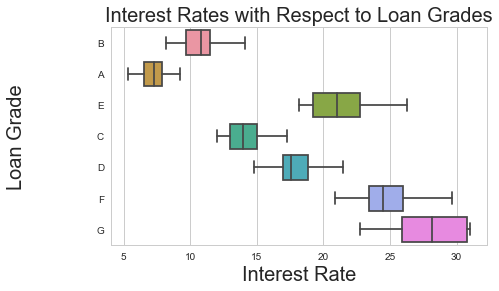

In [63]:
# Box plot of interest rates with respect to loan grades
# We are going to use seaborn package for its nicer asthetics aspects and ease of use for this kind of plot
#
sns.set_style("whitegrid")
#
ax = sns.boxplot(x="int_rate", y="grade", data=loans, orient="h", showfliers=False)
#
ax.set_xlabel('Interest Rate', fontsize = 20)
ax.set_ylabel('Loan Grade', fontsize = 20, labelpad = 70)
ax.set_title("Interest Rates with Respect to Loan Grades", fontsize = 20)

#ax.set(xlabel='Interest Rate',fontsize=20, ylabel='Loan Grade')

In [64]:
# Descriptive Statistics for Loan Purpose Distribution with respect to loan amount
#
loans.groupby(loans.purpose)['loan_amnt'].describe()

count     mean     std     min     25%      50%  \
purpose                                                                  
car                 16026.00  9278.45 6592.77 1000.00 5000.00  7200.00   
credit_card        358485.00 15273.42 8562.60 1000.00 8850.00 13775.00   
debt_consolidation 936007.00 15637.72 8681.54 1000.00 9000.00 14375.00   
educational             1.00  2200.00     nan 2200.00 2200.00  2200.00   
home_improvement   105832.00 14392.97 9338.68 1000.00 7000.00 12000.00   
house                6842.00 15289.36 9487.17 1000.00 7975.00 13000.00   
major_purchase      33285.00 12159.45 9105.14 1000.00 5000.00 10000.00   
medical             18148.00  9125.06 7197.09 1000.00 4000.00  7000.00   
moving              10759.00  7994.96 6594.14 1000.00 3500.00  6000.00   
other               89151.00  9994.45 7978.36 1000.00 4000.00  8000.00   
renewable_energy      988.00 10312.37 8363.90 1000.00 4000.00  8000.00   
small_business      16621.00 15844.52 9755.60 1000.00 8000.00 14000.00   
vacation            10752.00  6158.23 5352.94 1000.00 2600.00  5000.00   
wedding              1346.00 11020.93 7139.46 1000.00 6000.00  9800.00   

                        75%      max  
purpose                               
car                12000.00 40000.00  
credit_card        20000.00 40000.00  
debt_consolidation 20325.00 40000.00  
educational         2200.00  2200.00  
home_improvement   20000.00 40000.00  
house              21000.00 40000.00  
major_purchase     16675.00 40000.00  
medical            12000.00 40000.00  
moving             10000.00 40000.00  
other              13800.00 40000.00  
renewable_energy   14812.50 40000.00  
small_business     22125.00 40000.00  
vacation            8000.00 40000.00  
wedding            15000.00 35000.00

In [65]:
# Descriptive Statistics for Loan Purpose Distribution with respect to interest rate
#
loans.groupby(loans.purpose)['int_rate'].describe()

count  mean  std   min   25%   50%   75%   max
purpose                                                              
car                 16026.00 12.22 4.58  5.32  8.39 11.53 14.65 30.99
credit_card        358485.00 11.80 4.17  5.32  8.38 11.47 14.08 30.99
debt_consolidation 936007.00 13.63 4.71  5.32 10.42 13.18 16.29 30.99
educational             1.00 11.53  nan 11.53 11.53 11.53 11.53 11.53
home_improvement   105832.00 12.79 4.83  5.32  9.16 12.29 15.59 30.99
house                6842.00 16.12 5.78  5.32 11.99 15.61 19.89 30.99
major_purchase      33285.00 12.86 4.89  5.32  9.17 12.39 15.61 30.99
medical             18148.00 13.88 4.73  5.32 10.75 13.49 16.59 30.99
moving              10759.00 15.19 4.91  5.32 11.67 14.49 18.24 30.99
other               89151.00 14.68 5.02  5.32 11.44 13.99 17.86 30.99
renewable_energy      988.00 15.37 4.90  5.32 11.99 14.99 18.49 30.99
small_business      16621.00 16.09 5.33  5.32 12.49 15.61 19.22 30.99
vacation            10752.00 13.54 4.43  5.32 10.49 13.11 16.02 30.99
wedding              1346.00 15.73 4.95  6.03 12.12 16.29 19.05 25.99

In [251]:
# Descriptive Statistics for Loan Purpose Distribution with respect to loan grades
#
loans.groupby(loans.grade)['purpose'].value_counts()

grade  purpose           
A      debt_consolidation    129283
       credit_card            85248
       home_improvement       21798
       other                   8791
       major_purchase          6809
       car                     3819
       medical                 2258
       small_business          1368
       vacation                1368
       moving                   831
       house                    686
       wedding                  202
       renewable_energy          80
B      debt_consolidation    264836
       credit_card           128148
       home_improvement       30825
       other                  20412
       major_purchase          9631
       car                     4968
       medical                 4733
       vacation                2884
       small_business          2746
       moving                  2137
       house                   1196
       wedding                  265
       renewable_energy         189
       educational                1
C 

In [66]:
# Descriptive Statistics for Loan Amounts with respect to loan grades and purpose
#
loans.groupby(['grade', 'purpose'])['loan_amnt'].describe()

count     mean      std      min      25%  \
grade purpose                                                            
A     car                  3819.00  8510.23  5609.94  1000.00  5000.00   
      credit_card         85248.00 14832.88  8048.03  1000.00  8500.00   
      debt_consolidation 129283.00 14859.93  8071.79  1000.00  8500.00   
      home_improvement    21798.00 13193.56  8678.64  1000.00  6000.00   
      house                 686.00 16408.64  9782.97  1000.00  8100.00   
      major_purchase       6809.00 10823.67  7828.16  1000.00  5000.00   
      medical              2258.00  8916.43  6555.91  1000.00  4500.00   
      moving                831.00  8826.35  7267.96  1000.00  4000.00   
      other                8791.00 10066.39  7652.94  1000.00  5000.00   
      renewable_energy       80.00 10163.75  8395.07  1000.00  4000.00   
      small_business       1368.00 15216.45 10089.77  1000.00  7200.00   
      vacation             1368.00  6292.87  4990.94  1000.00  3000.00   
      wedding               202.00 10318.94  6603.33  1200.00  5025.00   
B     car                  4968.00  8579.72  6069.02  1000.00  4800.00   
      credit_card        128148.00 14141.06  8253.45  1000.00  8000.00   
      debt_consolidation 264836.00 14147.77  8139.35  1000.00  8000.00   
      educational             1.00  2200.00      nan  2200.00  2200.00   
      home_improvement    30825.00 12904.16  8847.42  1000.00  6000.00   
      house                1196.00 14672.68  9422.89  1000.00  7200.00   
      major_purchase       9631.00 10740.35  8520.20  1000.00  5000.00   
      medical              4733.00  8320.25  6548.32  1000.00  4000.00   
      moving               2137.00  7269.38  5785.07  1000.00  3500.00   
      other               20412.00  9101.35  7236.14  1000.00  4000.00   
      renewable_energy      189.00 10220.63  8267.26  1000.00  5000.00   
      small_business       2746.00 14678.13  9652.20  1000.00  7000.00   
      vacation             2884.00  5883.21  4870.62  1000.00  2893.75   
      wedding               265.00 10878.68  7053.60  1000.00  6000.00   
C     car                  4396.00  9469.28  6745.87  1000.00  4593.75   
      credit_card         94964.00 15846.58  8819.18  1000.00  9600.00   
      debt_consolidation 294010.00 15517.33  8769.08  1000.00  9000.00   
      home_improvement    30112.00 14421.83  9326.31  1000.00  7000.00   
      house                1781.00 14501.38  9360.91  1000.00  7000.00   
      major_purchase       9467.00 11966.50  9087.66  1000.00  5000.00   
      medical              5939.00  8671.99  6918.39  1000.00  3600.00   
      moving               3504.00  7636.84  6030.76  1000.00  3600.00   
      other               28932.00  9239.86  7628.86  1000.00  4000.00   
      renewable_energy      306.00  9414.54  8170.87  1000.00  3600.00   
      small_business       4612.00 14864.36  9426.47  1000.00  7693.75   
      vacation             3743.00  5836.21  5079.23  1000.00  2500.00   
      wedding               278.00 10347.93  6028.83  1000.00  6000.00   
D     car                  1835.00 10192.48  7330.29  1000.00  4937.50   
      credit_card         33861.00 17020.52  8988.10  1000.00 10000.00   
      debt_consolidation 146714.00 16714.23  8962.19  1000.00 10000.00   
      home_improvement    13627.00 16139.03  9676.71  1000.00  8475.00   
      house                1358.00 14639.51  9533.76  1000.00  6731.25   
      major_purchase       4411.00 13884.87  9756.69  1000.00  6000.00   
      medical              3152.00  9361.71  7446.07  1000.00  3850.00   
      moving               2459.00  7393.51  6304.98  1000.00  3000.00   
      other               17858.00  9921.10  8026.06  1000.00  4000.00   
      renewable_energy      222.00  9933.56  8083.36  1000.00  3962.50   
      small_business       3800.00 15581.57  9561.59  1000.00  8000.00   
      vacation             1845.00  6197.71  5557.49  1000.00  2500.00   
      wedding               354.0

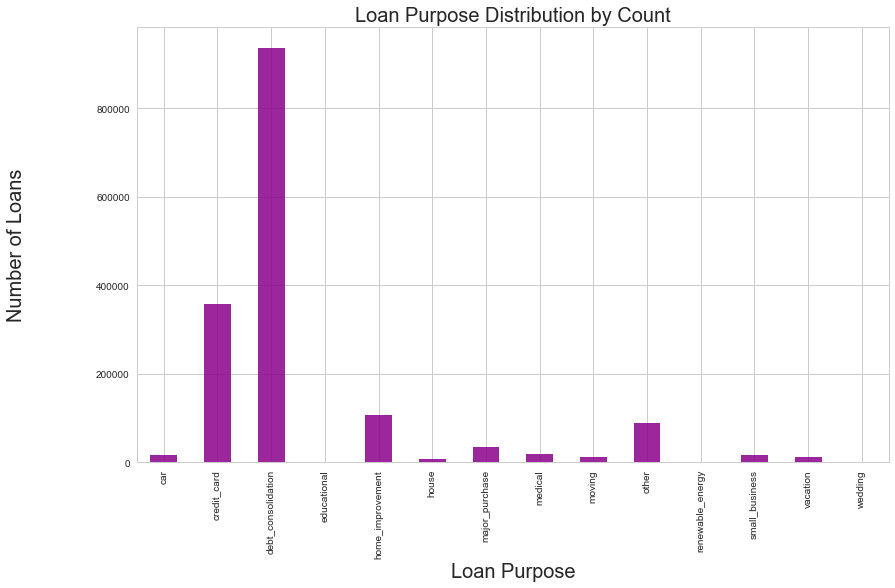

In [67]:
# Loan Purpose Distribution 
#
purpose = loans.groupby(loans.purpose)['id'].count()
#
purpose.plot(kind='bar', alpha=0.85, color='darkmagenta', figsize=(12,8))
plt.title("Loan Purpose Distribution by Count", fontsize = 20)
plt.xlabel("Loan Purpose", fontsize = 20)
plt.ylabel("Number of Loans", fontsize = 20, labelpad = 70)

In [68]:
# Descriptive Statistics on Loan Status with respect to loan amounts
#
loans.groupby(loans.loan_status)['loan_amnt'].describe()

count     mean     std     min      25%      50%  \
loan_status                                                               
Charged Off        169599.00 15499.59 8613.46 1000.00  9000.00 14300.00   
Current            758294.00 15127.48 9079.64 1000.00  8000.00 13200.00   
Default               121.00 17214.88 9388.48 1800.00  9475.00 17350.00   
Fully Paid         637191.00 14212.78 8489.23 1000.00  8000.00 12000.00   
In Grace Period     11506.00 16832.08 9226.28 1000.00 10000.00 15000.00   
Late (16-30 days)    5352.00 16402.25 9138.39 1000.00  9600.00 15000.00   
Late (31-120 days)  22180.00 15834.69 8998.87 1000.00  9000.00 14675.00   

                        75%      max  
loan_status                           
Charged Off        20125.00 40000.00  
Current            20000.00 40000.00  
Default            25000.00 35000.00  
Fully Paid         20000.00 40000.00  
In Grace Period    24000.00 40000.00  
Late (16-30 days)  22431.25 40000.00  
Late (31-120 days) 21000.00 40000.00

In [69]:
# Descriptive Statistics on Loan Status with respect to interest rates
#
loans.groupby(loans.loan_status)['int_rate'].describe()

count  mean  std  min   25%   50%   75%   max
loan_status                                                         
Charged Off        169599.00 15.79 4.67 5.32 12.69 15.41 18.55 30.99
Current            758294.00 12.81 4.71 5.32  9.44 12.29 15.10 30.99
Default               121.00 14.72 4.53 5.32 11.49 14.46 17.27 30.84
Fully Paid         637191.00 12.94 4.47 5.32  9.49 12.69 15.61 30.99
In Grace Period     11506.00 15.24 5.08 5.32 11.49 14.46 17.99 30.99
Late (16-30 days)    5352.00 15.51 5.26 5.32 11.53 14.49 18.25 30.99
Late (31-120 days)  22180.00 15.68 5.29 5.32 11.99 14.65 18.55 30.99

In [70]:
# Descriptive Statistics on Loan Status with respect to loan grades
#
loans.groupby(loans.grade)['loan_status'].value_counts()

grade  loan_status       
A      Current               131198
       Fully Paid            120807
       Charged Off             8457
       Late (31-120 days)      1100
       In Grace Period          661
       Late (16-30 days)        309
       Default                    9
B      Current               232671
       Fully Paid            200486
       Charged Off            31717
       Late (31-120 days)      4483
       In Grace Period         2495
       Late (16-30 days)       1096
       Default                   23
C      Current               241415
       Fully Paid            175426
       Charged Off            51782
       Late (31-120 days)      7500
       In Grace Period         4052
       Late (16-30 days)       1826
       Default                   43
D      Current                96384
       Fully Paid             87378
       Charged Off            39349
       Late (31-120 days)      4849
       In Grace Period         2359
       Late (16-30 days)       1153
  

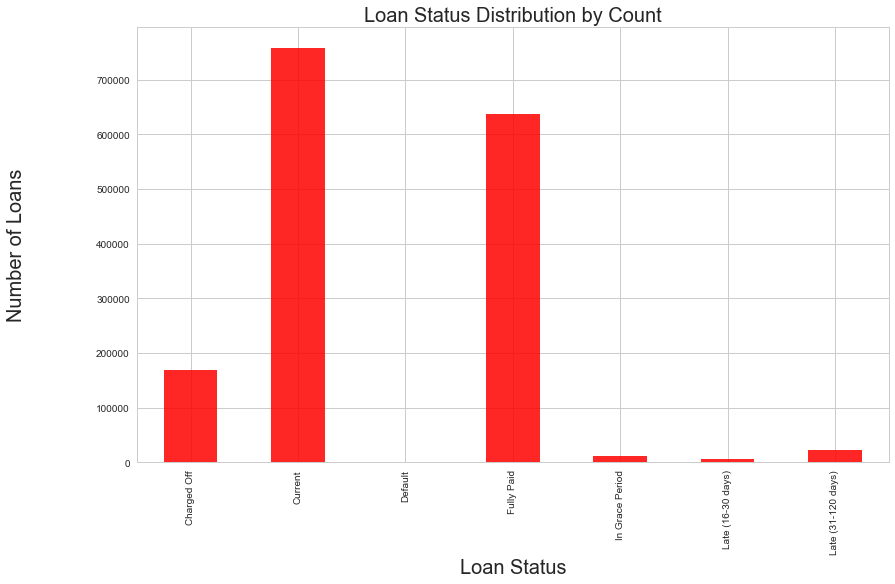

In [71]:
# Loan Status Distribution
#
status = loans.groupby(loans.loan_status)['id'].count()
#
status.plot(kind='bar', alpha=0.85, color='red', figsize=(12,8))
plt.title("Loan Status Distribution by Count", fontsize = 20)
plt.xlabel("Loan Status", fontsize = 20)
plt.ylabel("Number of Loans", fontsize = 20, labelpad = 70)

## 8. Data Clean-Up - Part II

In [72]:
# Let us start with checking the dimensions of our raw data
#
print("The dimensions of 'loans' data frame is:", loans.shape)
print("")
#
print("The columns of our 'loans' data frame are as follows: \n\n", loans.columns)

The dimensions of 'loans' data frame is: (1604263, 17)

The columns of our 'loans' data frame are as follows: 

 Index(['id', 'issue_d', 'year', 'month', 'loan_amnt', 'int_rate', 'grade',
       'sub_grade', 'application_type', 'annual_inc', 'dti', 'revol_util',
       'home_ownership', 'verification_status', 'addr_state', 'purpose',
       'loan_status'],
      dtype='object')


In [73]:
# Investigate missing or Null values
#
# First determine if there are empty data points in the data set
#
missing_data = loans.isnull().sum()
print("Number of Null Loan Attributes:\n\n{}".format(missing_data))

Number of Null Loan Attributes:

id                       0
issue_d                 20
year                    20
month                   20
loan_amnt               20
int_rate                20
grade                   20
sub_grade               20
application_type        20
annual_inc              20
dti                     24
revol_util             949
home_ownership          20
verification_status     20
addr_state              20
purpose                 20
loan_status             20
dtype: int64


In [74]:
# As we can see, there are signigicant number of rows with missing data points
# We are going to remove all rows with missing data points
#
loans = loans.dropna()

In [75]:
# Check for missing values
#
missing_data = loans.isnull().sum()
print("Number of Null Loan Attributes:\n{}".format(missing_data))

Number of Null Loan Attributes:
id                     0
issue_d                0
year                   0
month                  0
loan_amnt              0
int_rate               0
grade                  0
sub_grade              0
application_type       0
annual_inc             0
dti                    0
revol_util             0
home_ownership         0
verification_status    0
addr_state             0
purpose                0
loan_status            0
dtype: int64


In [76]:
# Drop home ownership attributes than mortgate, rent, and own
# Within the scope of this study, we want to use these three values as financial performance indicators
#
loans = loans[(loans.home_ownership == 'RENT')|(loans.home_ownership == 'MORTGAGE')|
                           (loans.home_ownership == 'OWN')]

In [77]:
# Check home ownership attribute after clean up
#
print(loans['home_ownership'].value_counts())

MORTGAGE    795710
RENT        632746
OWN         174256
Name: home_ownership, dtype: int64


In [78]:
# Investigate loan application type
#
print(loans['application_type'].value_counts())

Individual    1568249
Joint App       34463
Name: application_type, dtype: int64


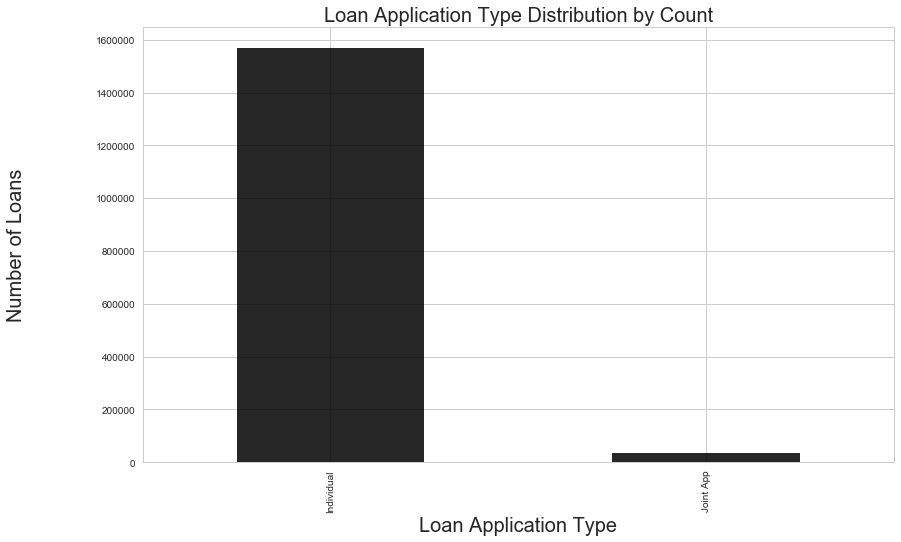

In [79]:
# Loan Status Distribution
#
loan_app_type = loans.groupby(loans.application_type)['id'].count()
#
loan_app_type.plot(kind='bar', alpha=0.85, color='Black', figsize=(12,8))
plt.title("Loan Application Type Distribution by Count", fontsize = 20)
plt.xlabel("Loan Application Type", fontsize = 20)
plt.ylabel("Number of Loans", fontsize = 20, labelpad = 70)

In [80]:
# Investigate applicant income verification status
#
print(loans['verification_status'].value_counts())

Source Verified    617382
Not Verified       496807
Verified           488523
Name: verification_status, dtype: int64


In [81]:
# Let us conclude this section by checking the dimensions of our raw data
#
print("The dimensions of 'loans' data frame is:", loans.shape)

The dimensions of 'loans' data frame is: (1602712, 17)


In [82]:
loans.groupby(loans.year)['id'].count()

year
2012.00     53232
2013.00    134736
2014.00    235503
2015.00    420929
2016.00    434032
2017.00    324280
Name: id, dtype: int64

In [83]:
# Check data frame after data modification and data cleaning
#
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602712 entries, 0 to 122700
Data columns (total 17 columns):
id                     1602712 non-null object
issue_d                1602712 non-null datetime64[ns]
year                   1602712 non-null float64
month                  1602712 non-null float64
loan_amnt              1602712 non-null float64
int_rate               1602712 non-null float64
grade                  1602712 non-null object
sub_grade              1602712 non-null object
application_type       1602712 non-null object
annual_inc             1602712 non-null float64
dti                    1602712 non-null float64
revol_util             1602712 non-null object
home_ownership         1602712 non-null object
verification_status    1602712 non-null object
addr_state             1602712 non-null object
purpose                1602712 non-null object
loan_status            1602712 non-null object
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 220.1+ MB


In [84]:
# Let us save the clean the data set into a new .csv file so we can use it again as needed
#
loans.to_csv("loans_clean.csv", index = False)

## 9. Predictive Analytics - Part I

### Claim

The quality of a loan is expressed in terms of a measure called the **loan grade** which varies from *A* to *G* with *A* representing the highest quality loans, while *G* representing the lowest quality loans. Our intuition tells us that **interest rates** are inversely correlated with the **loan grades**. In other words, lower the quality of the issued loan,  higher the respective **interest rates**.<br/>
<br/>
In this section, we are going to seek to validate our claim through the visualization of the data along with statistical analyses. If our claim is validated, we will build a predictive model by implementing a classifier model that will assign a loan with a **loan grade** considering **interest rates** among other features.<br/>
<br/>
To do so, the following training and testing sets will be utilized from here on out.

In [85]:
# Loan year distribution
#
loans.groupby(loans.year)['id'].count()

year
2012.00     53232
2013.00    134736
2014.00    235503
2015.00    420929
2016.00    434032
2017.00    324280
Name: id, dtype: int64

In [86]:
# Convert Grade from categorical to numeric data
#
number = LabelEncoder()
loans['number_grade'] = number.fit_transform(loans['grade'].astype('str'))

In [87]:
# Creates new colum to reflect loan grades worsening as loans go from A to G (0 to 6)
#
loans['neg_num_grade'] = [-x for x in loans['number_grade']]

# Training set: year 2012 - 2016
#
train = loans[loans['year'].between(2012.00, 2016.00)]

In [88]:
# Creates a training set for the dependent variable (x) of the linear regression model
#
train_lm_x = train['neg_num_grade']

# Training set independent variables (x)
#
train_x = train[['int_rate', 'annual_inc', 'dti', 'revol_util']]


# Creates a training set for the independent variable (y) of the linear regression model
#
train_lm_y = train['int_rate']

# Training set dependent variables (y)
#
train_y = train['grade']

In [89]:
# Test data
#
test = loans[loans['year'] == 2017.0]

test_x = test[['int_rate', 'annual_inc', 'dti', 'revol_util']]
test_lm_x = test['neg_num_grade']

test_y = test['grade']
test_lm_y = test['int_rate']

### (In)Validating Claim

First of all, we want to check our claim through visualization to see if we can observe any apparent evidence that can be used to validate or invalidate our claim. The first visualization is a scatter plot that plots **interest rates** against the **loan grade**. Note that because **loan grade** is expressed in numeric form, *A* to *G* is expressed as 0 to 6, we have color-scaled the data points by **loan grade** to explicitly demonstrate the increase in rates as loan quality decreases.<br/>
<br/>
Please also note that because the numeric representation of **loan grade** goes from 0 to 6, it appears as if loan quality is increasing when in fact it is decreasing from *A* to *G*.

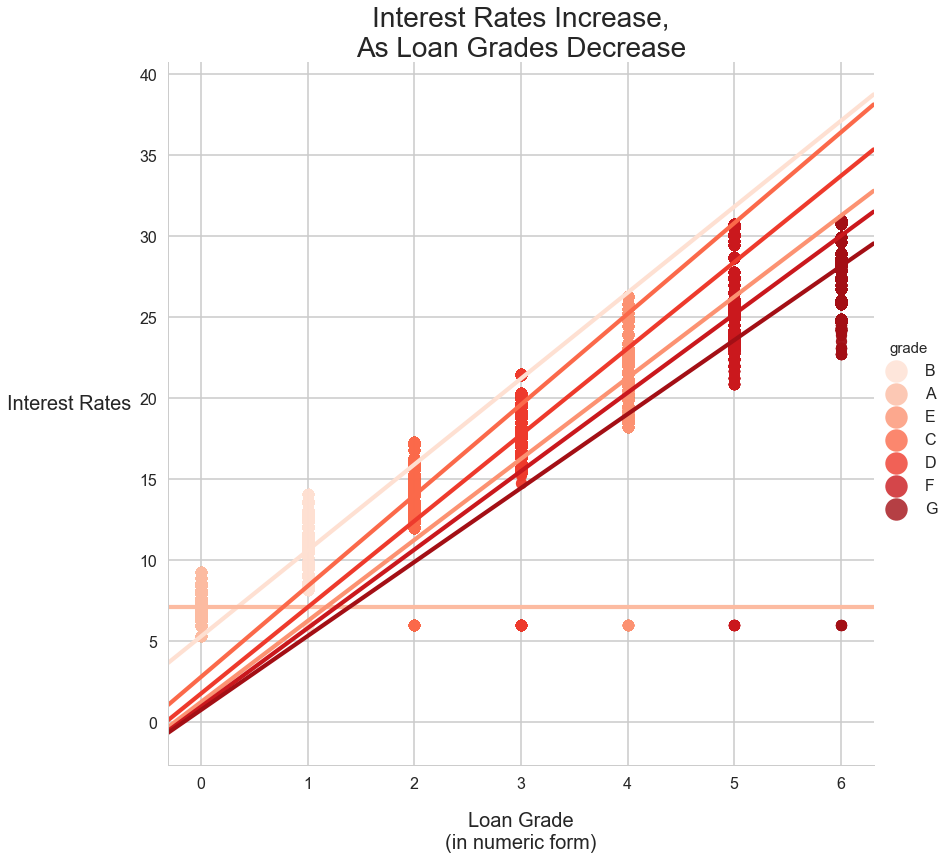

In [90]:
# Scatter plot
#
sns.set_context('poster')
plt.rcParams['legend.markerscale'] = 2
scat_plot = sns.lmplot(x = 'number_grade', y = 'int_rate', hue = 'grade', data = loans,
                        fit_reg = True, palette = 'Reds', size = 11)
ax_scatter = plt.gca()
ax_scatter.set_title('Interest Rates Increase,\nAs Loan Grades Decrease', fontsize = 28)
ax_scatter.set_xlabel('Loan Grade\n(in numeric form)', fontsize = 20, labelpad = 20)
ax_scatter.set_ylabel('Interest Rates', rotation = 0, fontsize = 20, labelpad = 70)

plt.show()

As we can observe from the scatter plot above, it appears that our assumption about the relationship between **loan grades** and **interest rates** is correct. There is an apparent upward trend in **interest rates** as we move from **loan grades** *A* to *G* (0 to 6), as shown by each regression line. Recall that this trend is counter-intuitive to our claim because of the ordering of **loan grades**. <br/>
<br/>
Additionally, we will also take a look at a **heatmap** in order to find further reassurance of our claim. Moreover, a heatmap will go into more detail showing **loan sub-grade** data as well. 

In [91]:
# Prepare heat map rows
#
ones = ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1']
twos = ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2']
threes = ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3']
fours = ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4']
fives = ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5']

# Creates a column that identifies the loan's sub-grade
#
loans['sub_number'] = 0
loans.loc[loans['sub_grade'].isin(ones), 'sub_number'] = 1
loans.loc[loans['sub_grade'].isin(twos), 'sub_number'] = 2
loans.loc[loans['sub_grade'].isin(threes), 'sub_number'] = 3
loans.loc[loans['sub_grade'].isin(fours), 'sub_number'] = 4
loans.loc[loans['sub_grade'].isin(fives), 'sub_number'] = 5

In [92]:
# Pivot table for heatmap
#
grade_pivot = loans.pivot_table(values = 'int_rate', index = 'sub_number', columns = 'grade', aggfunc = np.median)
grade_pivot

grade         A     B     C     D     E     F     G
sub_number                                         
1          5.32  8.39 12.62 16.29 19.99 23.13 26.77
2          6.49  9.93 13.49 17.57 19.52 24.08 27.31
3          7.12 10.49 13.99 18.25 20.99 24.50 28.34
4          7.49 10.99 14.49 18.99 21.97 24.99 29.96
5          7.97 11.53 15.59 19.53 22.45 25.78 30.99

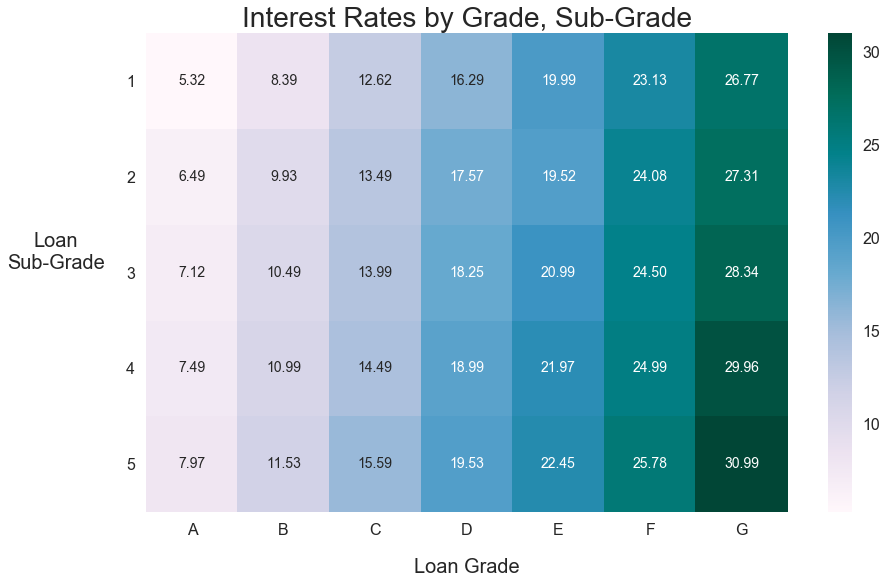

In [93]:
# Heatmap
#
from matplotlib import rcParams

rcParams['figure.figsize'] = (15.0, 10.0)

sns.set_context('poster')
sns.set_style('darkgrid')

grade_heat = sns.heatmap(grade_pivot, cmap = 'PuBuGn', annot = True, fmt = '.2f', annot_kws = {'fontsize':14})
plt.title('Interest Rates by Grade, Sub-Grade', fontsize = 28)
plt.yticks(rotation = 0)
plt.ylabel('Loan\nSub-Grade', rotation = 0, fontsize = 20, labelpad = 70)
plt.xlabel('Loan Grade', fontsize = 20, labelpad = 20)

plt.show()

Once again, we can see a definitive validation of our claim. As the quality of loans worsens, we observe higher interest rate values within darker colored squares across the horizontal axis. Interest rates also increase as the loan sub-grade worsens, observed as the squares darken across the vertical axis.

Now that we have data visualizations to validate our claim, we know that our intuitions are in the right direction. Statistical analysis will serve as the concrete evidence that will really solidy our claim as validated on all fronts.

In [94]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression to verify correlation 
# 
lm = linear_model.LinearRegression()
train_lm_x = sm.add_constant(train_lm_x)

lm.fit(train_lm_x, train_lm_y)

# Make predictions using the testing set
#
test_lm_x = sm.add_constant(test_lm_x)
lm_pred = lm.predict(test_lm_x)

# The coefficients
#
print('Coefficients: \n', lm.coef_)

# Explained variance score: 1 is perfect prediction
#
print('Variance score: %.2f' % r2_score(test_lm_y, lm_pred))

Coefficients: 
 [ 0.         -3.41970499]
Variance score: 0.90


The output above shows a variance score of  0.90 along with a negative coefficient. This implies that the predicted values from the linear model explains 90% of the variance in the original data, indicating that interest rates and loan grades are significantly correlated to each other. 

The negative coefficient indicates that there is an inverse relationship between the two variables, thus validating our claim that as loan grades worsen, interest rates rise.

### Naive Bayes Classifier Model

In light of developing evidence, bolstering our initial claim, we decided to build upon our validated assumption and develop a classifier model that will determine what loan grade is merited given a set of features as financial indicators.

The features we have chosen to include are annual income, debt-to-income ratio, revolving credit utilization percentage, and last but not least, interest rate.

In [95]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classification Model
#
model = GaussianNB()

# Predicting the interest rate with model
#
y_pred = model.fit(train_x, train_y).predict(test_x)

test['prediction'] = y_pred

In [96]:
# Prepping data to display Model Accuracy table and bar plot
#
test['scatter'] = 'Incorrect Prediction'
test.loc[test['prediction'] == test['grade'], 'scatter'] = 'Match'

# Counts for correct and incorrect model prediction
#
mod_cor = sum(str(x) == 'Match' for x in test['scatter']) 
mod_inc = len(test['scatter']) - mod_cor
total = len(test['scatter'])
cor_pct = '{:.2%}'.format(round(mod_cor/len(test['scatter']), 4))

In [97]:
from astropy.table import Table

# Model Accuracy Table
#
arr = np.array([(mod_cor, mod_inc, total, cor_pct)], 
               dtype = [('Correctly Classified', 'i4'), ('Incorrectly Classified', 'i4'), ('Total', 'i4'),
                        ('Accuracy', 'S8')])


accu_tab = Table(arr)
print(accu_tab)

Correctly Classified Incorrectly Classified Total  Accuracy
-------------------- ---------------------- ------ --------
              276556                  47724 324280   85.28%


The table above shows the results of our classifier model. It has an classification accuracy of $85.28$%, which is fairly good. The methodology behind this is doing a simple count of correctly classified observations divided by the total amount of observations.

This model accuracy figure is verified by using the Python library, _**SK-Learn.Metrics**_, as shown below.

In [99]:
# Model accuracy
#
skm.accuracy_score(test_y, y_pred)

0.85283088688787467

In order to visualize the our model results a in a better way and a more granular fashion by **loan grade**, we generated the bar plot further below.

In [100]:
# Subsetting data sets by Grade in preparation for the following bar plots 
#
A = test.loc[test['grade'] == 'A']
A_cor = sum(str(x) == 'Match' for x in A['scatter'])
A_inc = len(A) - A_cor     
            
B = test.loc[test['grade'] == 'B']
B_cor = sum(str(x) == 'Match' for x in B['scatter'])
B_inc = len(B) - B_cor

C = test.loc[test['grade'] == 'C']
C_cor = sum(str(x) == 'Match' for x in C['scatter'])
C_inc = len(C) - C_cor

D = test.loc[test['grade'] == 'D']
D_cor = sum(str(x) == 'Match' for x in D['scatter'])
D_inc = len(D) - D_cor

E = test.loc[test['grade'] == 'E']
E_cor = sum(str(x) == 'Match' for x in E['scatter'])
E_inc = len(E) - E_cor

F = test.loc[test['grade'] == 'F']
F_cor = sum(str(x) == 'Match' for x in F['scatter'])
F_inc = len(F) - F_cor

G = test.loc[test['grade'] == 'G']
G_cor = sum(str(x) == 'Match' for x in G['scatter'])
G_inc = len(G) - G_cor

cor_pred = (A_cor, B_cor, C_cor, D_cor, E_cor, F_cor, G_cor)
inc_pred = (A_inc, B_inc, C_inc, D_inc, E_inc, F_inc, G_inc)

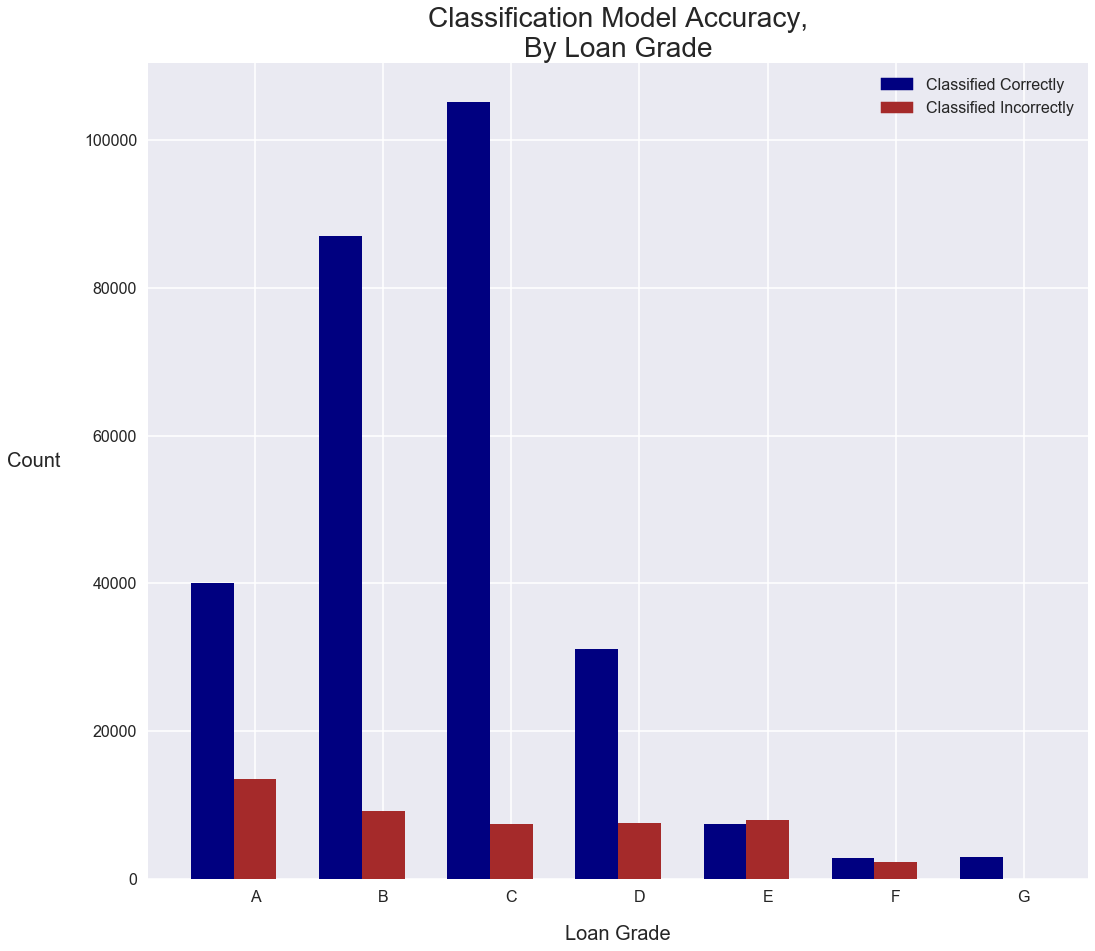

In [285]:
import matplotlib.patches as mpatches

# Bar plot
#
ind = [5,6,7,8,9,10,11]
width = np.min(np.diff(ind))/3
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

cor_bar = ax.bar(ind - width, cor_pred, width, color = 'navy')
inc_bar = ax.bar(ind, inc_pred , width, color = 'brown')

plt.title('Classification Model Accuracy,\nBy Loan Grade', fontsize = 28)
plt.xticks(ind, labels)
plt.xlabel('Loan Grade', fontsize = 20, labelpad = 20)
plt.ylabel('Count', rotation = 0, fontsize = 20, labelpad = 50)

cor = mpatches.Patch(color = 'navy', label = 'Classified Correctly')
inc = mpatches.Patch(color = 'brown', label = 'Classified Incorrectly')
plt.legend(handles = [cor, inc], loc = 0)

plt.show()

### Further Study 

More work and research can be done to explore the effects of **home ownership** might have on the loan quality. We have generated a horizontal stacked bar plot further below to visualize the distribution of **home ownership** status amongst different **loan grades**. 

In [101]:
# Prepping data for horizontal stacked bar plot
#
A2 = loans.loc[loans['grade'] == 'A']
A_own = sum(str(x) == 'OWN' for x in A2['home_ownership'])
A_mort = sum(str(x) == 'MORTGAGE' for x in A2['home_ownership'])   
A_rent = sum(str(x) == 'RENT' for x in A2['home_ownership'])
            
B2 = loans.loc[loans['grade'] == 'B']
B_own = sum(str(x) == 'OWN' for x in B2['home_ownership'])
B_mort = sum(str(x) == 'MORTGAGE' for x in B2['home_ownership'])   
B_rent = sum(str(x) == 'RENT' for x in B2['home_ownership'])

C2 = loans.loc[loans['grade'] == 'C']
C_own = sum(str(x) == 'OWN' for x in C2['home_ownership'])
C_mort = sum(str(x) == 'MORTGAGE' for x in C2['home_ownership'])   
C_rent = sum(str(x) == 'RENT' for x in C2['home_ownership'])

D2 = loans.loc[loans['grade'] == 'D']
D_own = sum(str(x) == 'OWN' for x in D2['home_ownership'])
D_mort = sum(str(x) == 'MORTGAGE' for x in D2['home_ownership'])   
D_rent = sum(str(x) == 'RENT' for x in D2['home_ownership'])

E2 = loans.loc[loans['grade'] == 'E']
E_own = sum(str(x) == 'OWN' for x in E2['home_ownership'])
E_mort = sum(str(x) == 'MORTGAGE' for x in E2['home_ownership'])   
E_rent = sum(str(x) == 'RENT' for x in E2['home_ownership'])

F2 = loans.loc[loans['grade'] == 'F']
F_own = sum(str(x) == 'OWN' for x in F2['home_ownership'])
F_mort = sum(str(x) == 'MORTGAGE' for x in F2['home_ownership'])   
F_rent = sum(str(x) == 'RENT' for x in F2['home_ownership'])

G2 = loans.loc[loans['grade'] == 'G']
G_own = sum(str(x) == 'OWN' for x in G2['home_ownership'])
G_mort = sum(str(x) == 'MORTGAGE' for x in G2['home_ownership'])   
G_rent = sum(str(x) == 'RENT' for x in G2['home_ownership'])

# Stacked bars
#
own = (A_own, B_own, C_own, D_own, E_own, F_own, G_own)
mort = (A_mort, B_mort, C_mort, D_mort, E_mort, F_mort, G_mort)
rent = (A_rent, B_rent, C_rent, D_rent, E_rent, F_rent, G_rent)

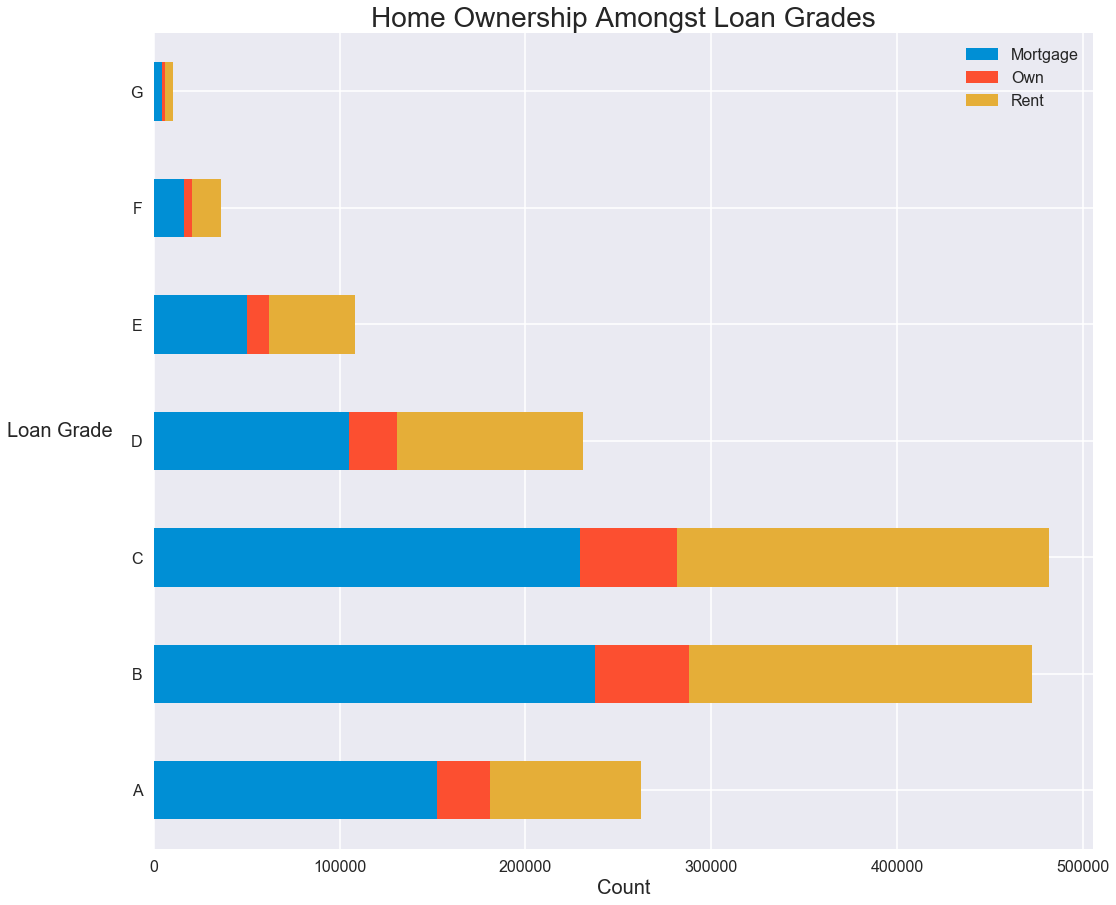

In [287]:
# Horizontal stacked bar plot
#
horiz_bar = pd.DataFrame({'Own' : own, 'Mortgage' : mort, 'Rent' : rent})
ax = horiz_bar.plot.barh(stacked = True);

ax.figure.set_size_inches(15,15)

ax.set_title("Home Ownership Amongst Loan Grades", fontsize = 28)
ax.set_xlabel('Count', fontsize = 20)
ax.set_ylabel('Loan Grade', rotation = 0, fontsize = 20, labelpad = 70)
ax.set_yticklabels(labels)
ax.legend(loc = 'upper right')

It is apparent across all **loan grades** that fully paid-off home owners are the obvious minority. For the most part, there is a pretty even split between mortgage-holders and renters across the board, with mortgage-holders with the slight edge. <br/>

## 10. Predictive Analytics - Part II

### Predictive Model

In this section, we are going to build a predictive model based on **Logistic Regression** in order to predict loans most likely to be charged off.

### Preliminary Data Exploration

In [102]:
# Number of Rows and Columns
loans.shape

(1602712, 20)

In [103]:
#Different types of loans
loans['application_type'].value_counts()

Individual    1568249
Joint App       34463
Name: application_type, dtype: int64

In [104]:
#Report of loans statuses
loans['loan_status'].value_counts()

Current               757455
Fully Paid            636673
Charged Off           169467
Late (31-120 days)     22159
In Grace Period        11488
Late (16-30 days)       5349
Default                  121
Name: loan_status, dtype: int64

In [105]:
#Loan statuses of Joint Apps
loans[loans['application_type']== 'Joint App']['loan_status'].value_counts()

Current               28860
Fully Paid             3439
Charged Off             859
Late (31-120 days)      626
In Grace Period         491
Late (16-30 days)       186
Default                   2
Name: loan_status, dtype: int64

In [106]:
#Loan statuses of individuals
loans[loans['application_type']== 'Individual']['loan_status'].value_counts()


Current               728595
Fully Paid            633234
Charged Off           168608
Late (31-120 days)     21533
In Grace Period        10997
Late (16-30 days)       5163
Default                  119
Name: loan_status, dtype: int64

As we can see, **joint loan applications** are very seldom, therefore, we will focus on **individual loan applications** for the purpose of this study.

In [107]:
# Convert categorical data to numerical
# 
# Grade
number = LabelEncoder()
loans['number_grade'] = number.fit_transform(loans['grade'].astype('str'))

# Home ownership
#
loans['number_home_ownership'] = number.fit_transform(loans['home_ownership'].astype('str'))

#loan_status
loans['number_loan_status'] = np.where((loans['loan_status'] == 'Charged Off') | (loans['loan_status'] == 'Default'), 1 ,0)


In [108]:
#Number of charged off and non-Charged off loans

loans['number_loan_status'].value_counts()

0    1433124
1     169588
Name: number_loan_status, dtype: int64

In [109]:
#Extracting Individual loans

loans_ind=loans[loans['application_type'] == 'Individual']
loans_ind['id'] = range(0,len(loans_ind.index))


loans_ind.head()

id    issue_d    year  month  loan_amnt  int_rate grade sub_grade  \
0   0 2013-12-01 2013.00  12.00   12000.00     13.53     B        B5   
1   1 2013-12-01 2013.00  12.00   14000.00     12.85     B        B4   
2   2 2013-12-01 2013.00  12.00   15000.00      8.90     A        A5   
3   3 2013-12-01 2013.00  12.00   24000.00     13.53     B        B5   
4   4 2013-12-01 2013.00  12.00   28000.00      7.62     A        A3   

  application_type  annual_inc   dti revol_util home_ownership  \
0       Individual    40000.00 16.94       68.8           RENT   
1       Individual    88000.00 10.02       81.9           RENT   
2       Individual    63000.00 16.51       74.2       MORTGAGE   
3       Individual   100000.00 22.18       76.7       MORTGAGE   
4       Individual   325000.00 18.55       54.6       MORTGAGE   

  verification_status addr_state             purpose loan_status  \
0     Source Verified         NM  debt_consolidation  Fully Paid   
1        Not Verified         NC  debt_consolidation  Fully Paid   
2        Not Verified         FL  debt_consolidation  Fully Paid   
3            Verified         MI         credit_card  Fully Paid   
4     Source Verified         CA  debt_consolidation  Fully Paid   

   number_grade  neg_num_grade  sub_number  number_home_ownership  \
0             1             -1           5                      2   
1             1             -1           4                      2   
2             0              0           5                      0   
3             1             -1           5                      0   
4             0              0           3                      0   

   number_loan_status  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [110]:
#Extracting Joint Loans

loans_jnt=loans[loans['application_type'] == 'Joint App']
loans_jnt['id'] = range(0,len(loans_jnt.index))

loans_jnt.head()

id    issue_d    year  month  loan_amnt  int_rate grade sub_grade  \
31    0 2015-12-01 2015.00  12.00   20000.00     10.78     B        B4   
134   1 2015-12-01 2015.00  12.00   20000.00     13.44     C        C3   
359   2 2015-12-01 2015.00  12.00   15000.00     11.99     C        C1   
491   3 2015-12-01 2015.00  12.00   15000.00     14.85     C        C5   
608   4 2015-12-01 2015.00  12.00   24000.00     23.13     F        F2   

    application_type  annual_inc   dti revol_util home_ownership  \
31         Joint App    71000.00 13.85       56.2       MORTGAGE   
134        Joint App   100000.00 16.40       48.8       MORTGAGE   
359        Joint App    77000.00 15.40       88.3       MORTGAGE   
491        Joint App    61366.44 19.22         45       MORTGAGE   
608        Joint App   113314.00 25.44       73.1       MORTGAGE   

    verification_status addr_state             purpose loan_status  \
31         Not Verified         IL    home_improvement  Fully Paid   
134        Not Verified         MT  debt_consolidation     Current   
359     Source Verified         CA  debt_consolidation  Fully Paid   
491            Verified         CA  debt_consolidation     Current   
608            Verified         TX  debt_consolidation  Fully Paid   

     number_grade  neg_num_grade  sub_number  number_home_ownership  \
31              1             -1           4                      0   
134             2             -2           3                      0   
359             2             -2           1                      0   
491             2             -2           5                      0   
608             5             -5           2                      0   

     number_loan_status  
31                    0  
134                   0  
359                   0  
491                   0  
608                   0

In [111]:
loans_ind.groupby(loans_ind.year)['id'].count()

year
2012.00     53232
2013.00    134736
2014.00    235503
2015.00    420420
2016.00    425250
2017.00    299108
Name: id, dtype: int64

In [112]:
#Predicton of Charge off bt Logestic regression

# Training set1: year 2012 - 2014
#
tr_3yrs = loans_ind[loans_ind['year'].between(2012.0, 2014.0)]

# Training set2: year 2015 - 2016
#
tr_2yrs = loans_ind[loans_ind['year'].between(2015.0, 2016.0)]

In [113]:
tr_3yrs.head()

id    issue_d    year  month  loan_amnt  int_rate grade sub_grade  \
0   0 2013-12-01 2013.00  12.00   12000.00     13.53     B        B5   
1   1 2013-12-01 2013.00  12.00   14000.00     12.85     B        B4   
2   2 2013-12-01 2013.00  12.00   15000.00      8.90     A        A5   
3   3 2013-12-01 2013.00  12.00   24000.00     13.53     B        B5   
4   4 2013-12-01 2013.00  12.00   28000.00      7.62     A        A3   

  application_type  annual_inc   dti revol_util home_ownership  \
0       Individual    40000.00 16.94       68.8           RENT   
1       Individual    88000.00 10.02       81.9           RENT   
2       Individual    63000.00 16.51       74.2       MORTGAGE   
3       Individual   100000.00 22.18       76.7       MORTGAGE   
4       Individual   325000.00 18.55       54.6       MORTGAGE   

  verification_status addr_state             purpose loan_status  \
0     Source Verified         NM  debt_consolidation  Fully Paid   
1        Not Verified         NC  debt_consolidation  Fully Paid   
2        Not Verified         FL  debt_consolidation  Fully Paid   
3            Verified         MI         credit_card  Fully Paid   
4     Source Verified         CA  debt_consolidation  Fully Paid   

   number_grade  neg_num_grade  sub_number  number_home_ownership  \
0             1             -1           5                      2   
1             1             -1           4                      2   
2             0              0           5                      0   
3             1             -1           5                      0   
4             0              0           3                      0   

   number_loan_status  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

For this study, we selected two different subsets of data as our training sets. One of them was all loans from 2012 until 2014 as the first training set with name of tr_3yrs. Second set is all loans from 2015 to 2016 with name of tr_2yrs.

We applied method of logistic regression to both training sets and made two models for evaluation on data of 2017 about loand that would be defaulted. As we know, status of US economy during these years did not have any drastic changes, therefore the results of evaluation by these two models should be approximately the same. We will attepmpt validate our claim by evaluation of both models.

In [114]:
# Training set1 independent variables (x)
#
train_x_3yrs = tr_3yrs[[ 'annual_inc',  'dti', 'number_home_ownership','loan_amnt','int_rate','number_grade']]


# Training set1 dependent variables (x)
train_y_3yrs = tr_3yrs['number_loan_status']

# Model1

logistic_regression_model_3yrs = LogisticRegression()
logistic_regression_model_3yrs.fit(train_x_3yrs, train_y_3yrs)


logistic_regression_model_3yrs.score(train_x_3yrs, train_y_3yrs)

0.83991111551912645

We prapared input_vector  and output of 2012 to 2014, then we made our logistic regression model based on that. FInally, we evaluated it's score.

In [115]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_x_3yrs, train_y_3yrs, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.840


The average accuracy remains very close to the Logistic Regression model accuracy; therefore we can conclude that our model generalizes well.

In [116]:
# Training set2 independent variables (x)
#
train_x_2yrs = tr_2yrs[[ 'annual_inc',  'dti', 'number_home_ownership','loan_amnt','int_rate','number_grade']]


# Training set2 dependent variables (x)
train_y_2yrs = tr_2yrs['number_loan_status']

# Model2


logistic_regression_model_2yrs = LogisticRegression()
logistic_regression_model_2yrs.fit(train_x_2yrs, train_y_2yrs)
logistic_regression_model_2yrs.score(train_x_2yrs, train_y_2yrs)

0.88555819645961187

We prapared input_vector  and output of 2015 and 2016, then we made our logistic regression model based on that. FInally, we evaluated it's score.

In [117]:
# Test data

test_ind_2017 = loans_ind[loans_ind['year']== 2017]

test_x_ind_2017 = test_ind_2017[['annual_inc',  'dti', 'number_home_ownership','loan_amnt','int_rate','number_grade']]

test_y_ind_2017 = test_ind_2017['number_loan_status']


We prepared input vectors from loans of 2017 and output of loan_status for applying of our models.


In [118]:
logistic_regression_model_3yrs.score(test_x_ind_2017, test_y_ind_2017 )

0.98611203979833373

In [119]:
logistic_regression_model_2yrs.score(test_x_ind_2017, test_y_ind_2017 )

0.98611203979833373

Above results are scores of applying our logistic regression to testing information of 2017.

In [120]:
y_pred_3yrs = logistic_regression_model_3yrs.predict(test_x_ind_2017)
confusion_matrix_3yrs = confusion_matrix(test_y_ind_2017, y_pred_3yrs)
print(confusion_matrix_3yrs)

[[294954      0]
 [  4154      0]]


In [121]:
#treemap of default rate of states

Charged_of_loans=loans_ind[loans_ind['number_loan_status'] ==1]
Charged_of_loans.shape

(168727, 22)

In [122]:
#Default Rate of states

default_rate=100*(Charged_of_loans.groupby(Charged_of_loans.addr_state)['id'].count())/(loans_ind.groupby(loans_ind.addr_state)['id'].count())

In [320]:
default_rate      


addr_state
AK   11.20
AL   13.21
AR   12.74
AZ   10.78
CA   11.12
CO    8.98
CT    8.52
DC    7.69
DE   10.58
FL   11.49
GA    9.58
HI   11.44
IA   50.00
ID    5.49
IL    9.46
IN   11.20
KS    8.69
KY   11.21
LA   12.58
MA   10.10
MD   10.90
ME    3.56
MI   10.74
MN   10.97
MO   11.38
MS   11.02
MT    9.50
NC   11.33
ND    7.26
NE    8.98
NH    6.87
NJ   10.96
NM   12.47
NV   12.95
NY   11.63
OH   11.40
OK   12.73
OR    8.39
PA   11.08
RI    9.77
SC    8.47
SD   11.84
TN   11.26
TX   10.39
UT   11.10
VA   11.13
VT    6.94
WA    9.17
WI    8.82
WV   11.93
WY    9.92
Name: id, dtype: float64

As we can see, we calculated default rate of each state for further calculations.

In [123]:
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY',
}

Data dictionary given above is for assigning of each state's code to each state.

In [124]:
#Preparing a dictionary with key of state and value of default rate
state_default_rate={}
for state in us_state_abbrev:
    state_default_rate[state]=round(default_rate[us_state_abbrev[state]],2)
state_default_rate

{'Alabama': 13.210000000000001,
 'Alaska': 11.199999999999999,
 'Arizona': 10.779999999999999,
 'Arkansas': 12.74,
 'California': 11.119999999999999,
 'Colorado': 8.9800000000000004,
 'Connecticut': 8.5199999999999996,
 'Delaware': 10.58,
 'Florida': 11.49,
 'Georgia': 9.5800000000000001,
 'Hawaii': 11.44,
 'Idaho': 5.4900000000000002,
 'Illinois': 9.4600000000000009,
 'Indiana': 11.199999999999999,
 'Iowa': 50.0,
 'Kansas': 8.6899999999999995,
 'Kentucky': 11.210000000000001,
 'Louisiana': 12.58,
 'Maine': 3.5600000000000001,
 'Maryland': 10.9,
 'Massachusetts': 10.1,
 'Michigan': 10.74,
 'Minnesota': 10.970000000000001,
 'Mississippi': 11.02,
 'Missouri': 11.380000000000001,
 'Montana': 9.5,
 'Nebraska': 8.9800000000000004,
 'Nevada': 12.949999999999999,
 'New Hampshire': 6.8700000000000001,
 'New Jersey': 10.960000000000001,
 'New Mexico': 12.470000000000001,
 'New York': 11.630000000000001,
 'North Carolina': 11.33,
 'North Dakota': 7.2599999999999998,
 'Ohio': 11.4,
 'Oklahoma': 1

By combination of above series and the data dictionary, we made a dictionary that contains default rate of each state.

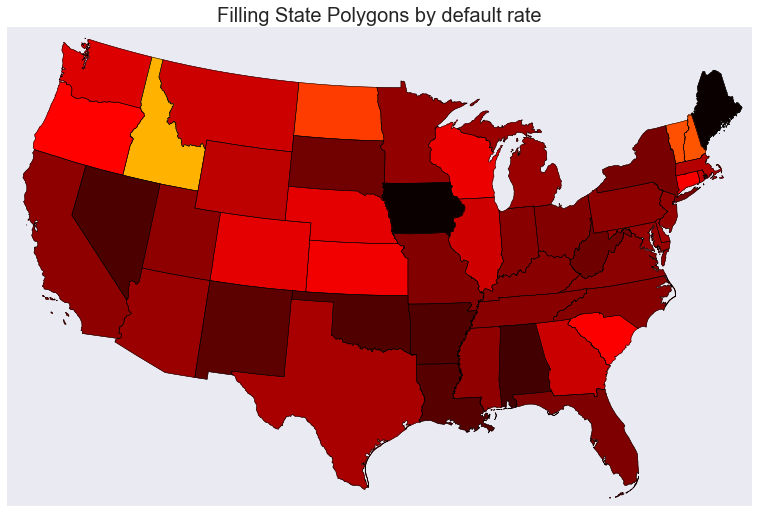

In [126]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

# choose a color for each state based on default raفث.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 4; vmax = 15 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = state_default_rate[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by default rate', fontsize = 20)
plt.show()

In the map shown above, yellow indicates the state(s) with the lowest default rate and then progresses from orange, red and black which indicates the state(s) with higher default rates.

## 11. Novel Visualization

For our "novel visualization" we decided to create a dynamic map which provides high level information such as average annual income, average debt-to-income ratio, as well as average loan amount filtered by loan status. 

To do so, we used Tableau Public edition and saved a few sample graphics in `.jpg` file format. 

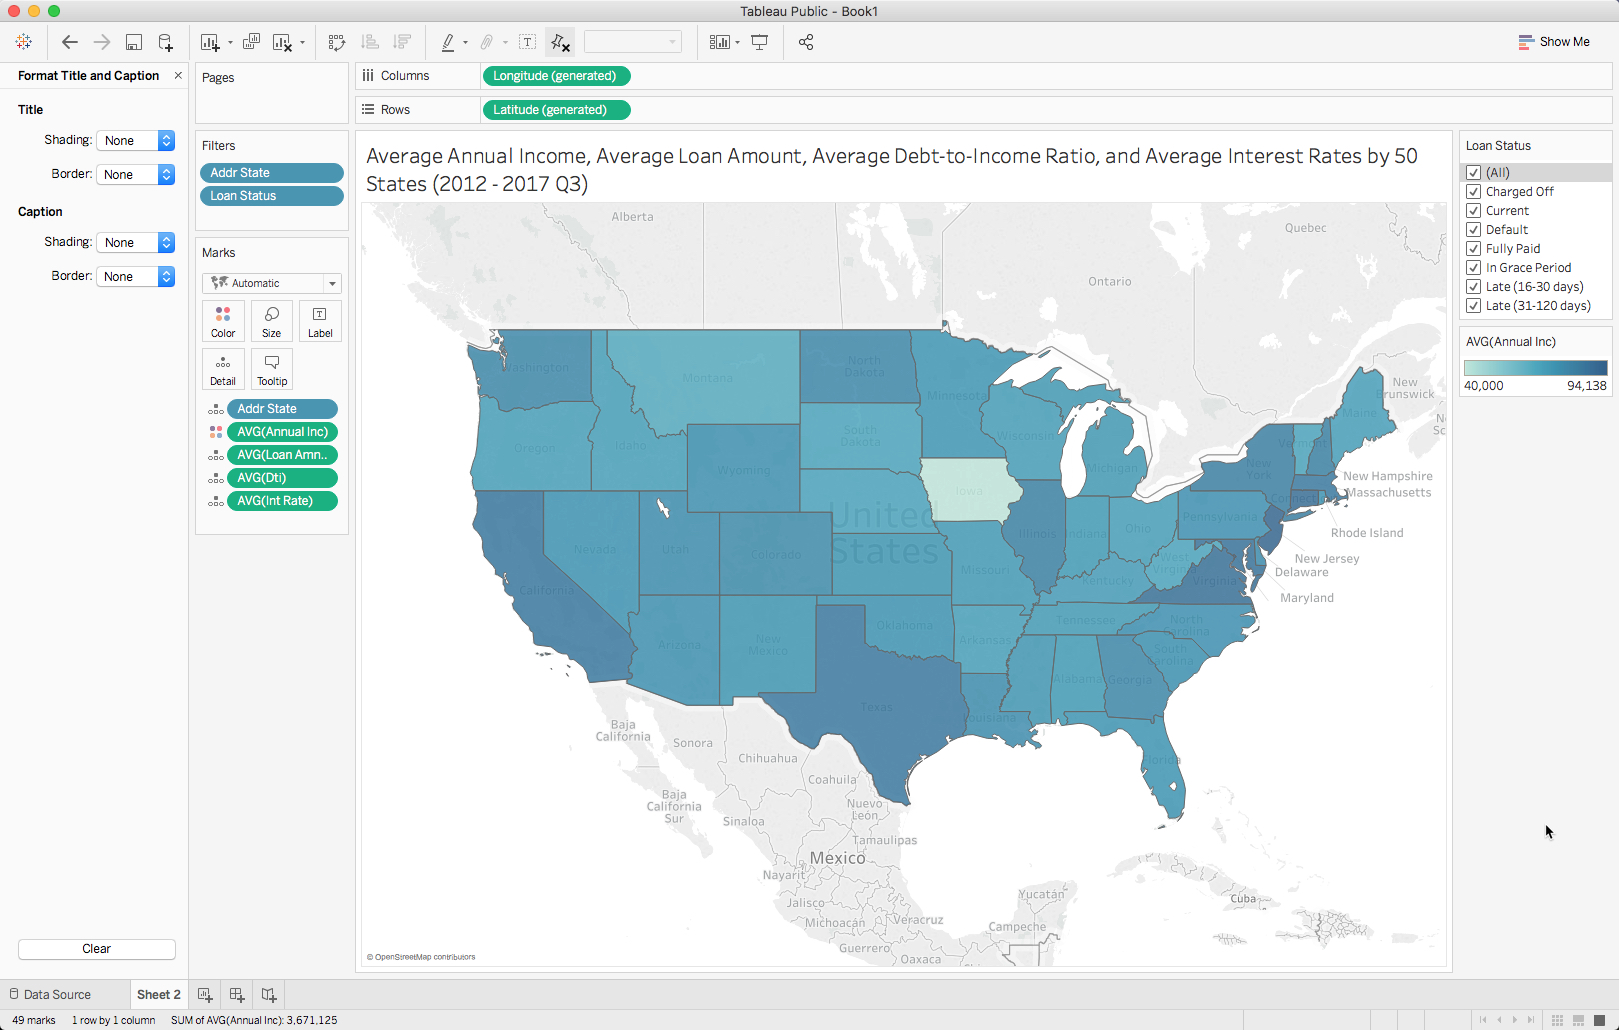

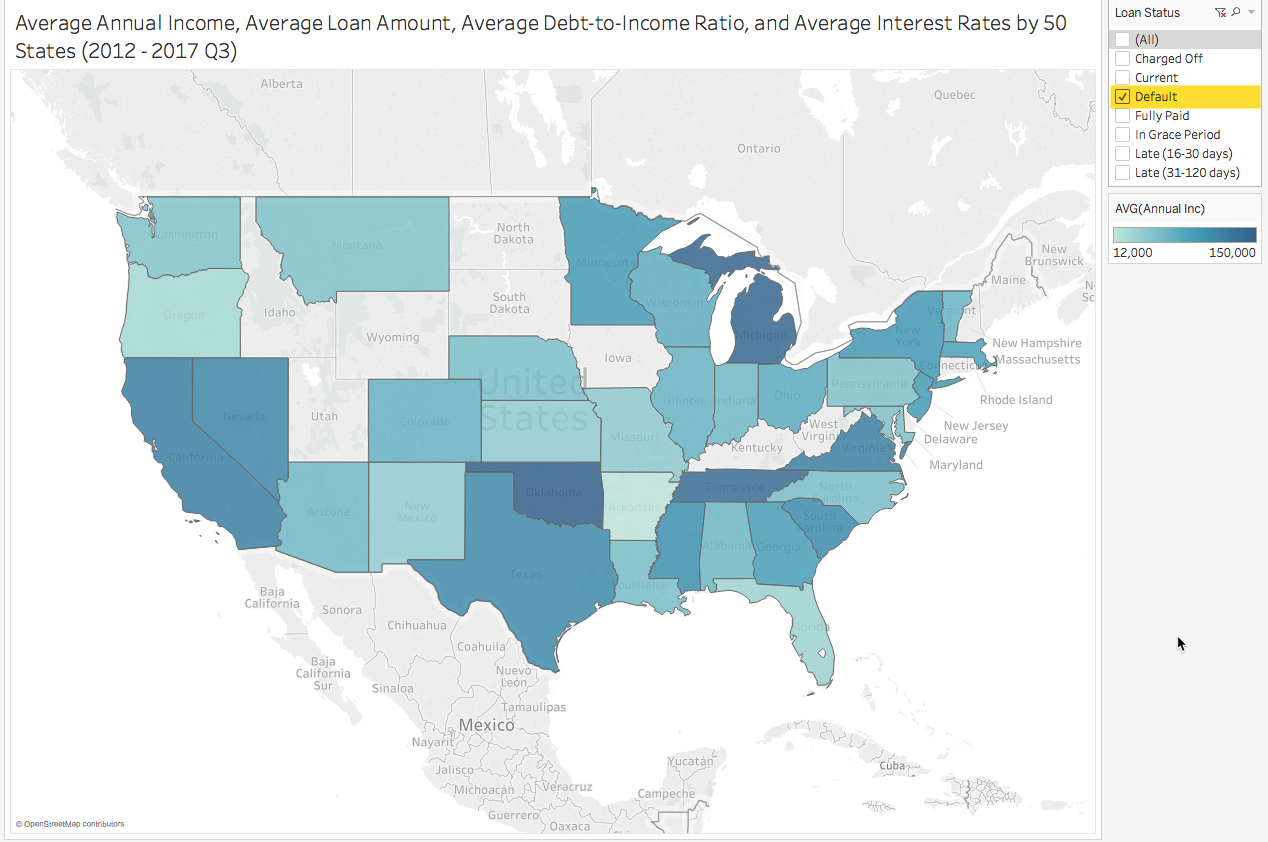

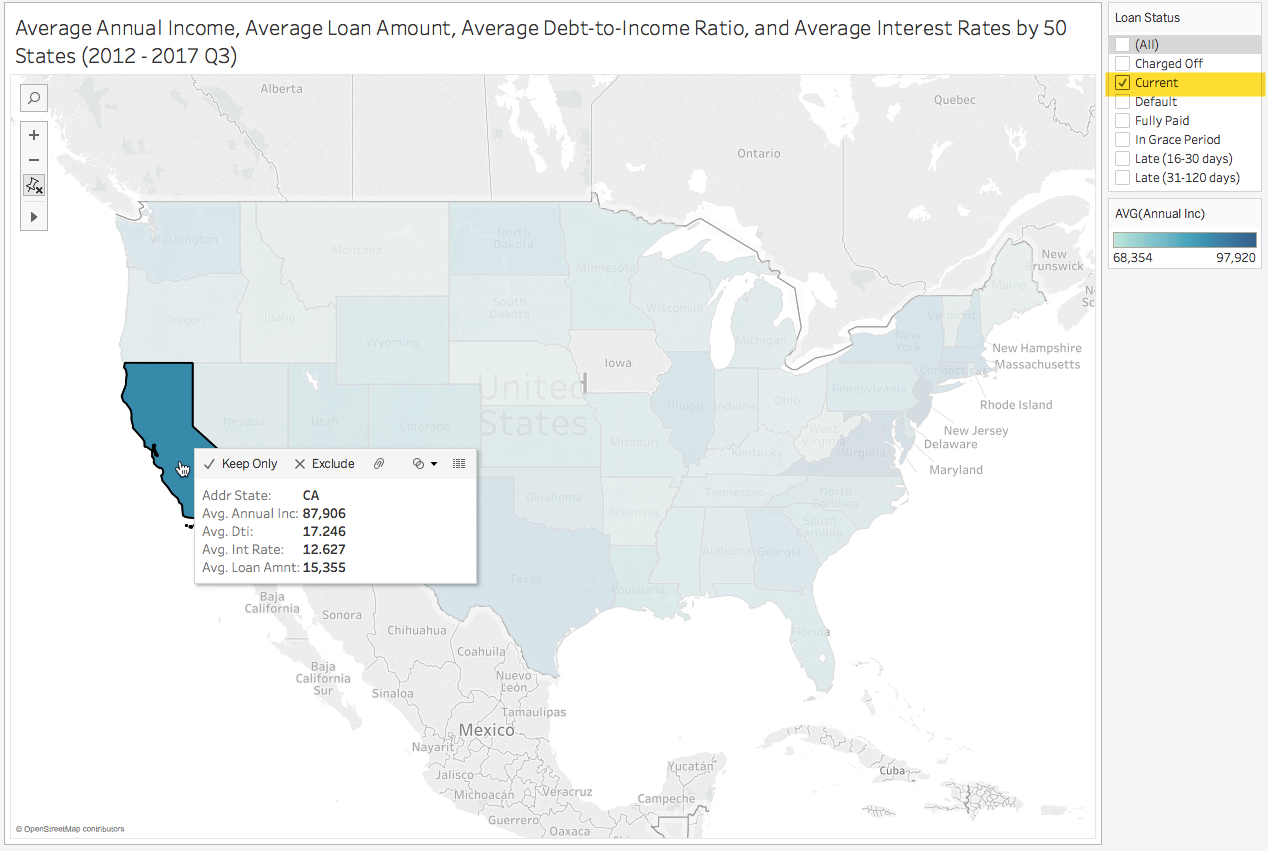

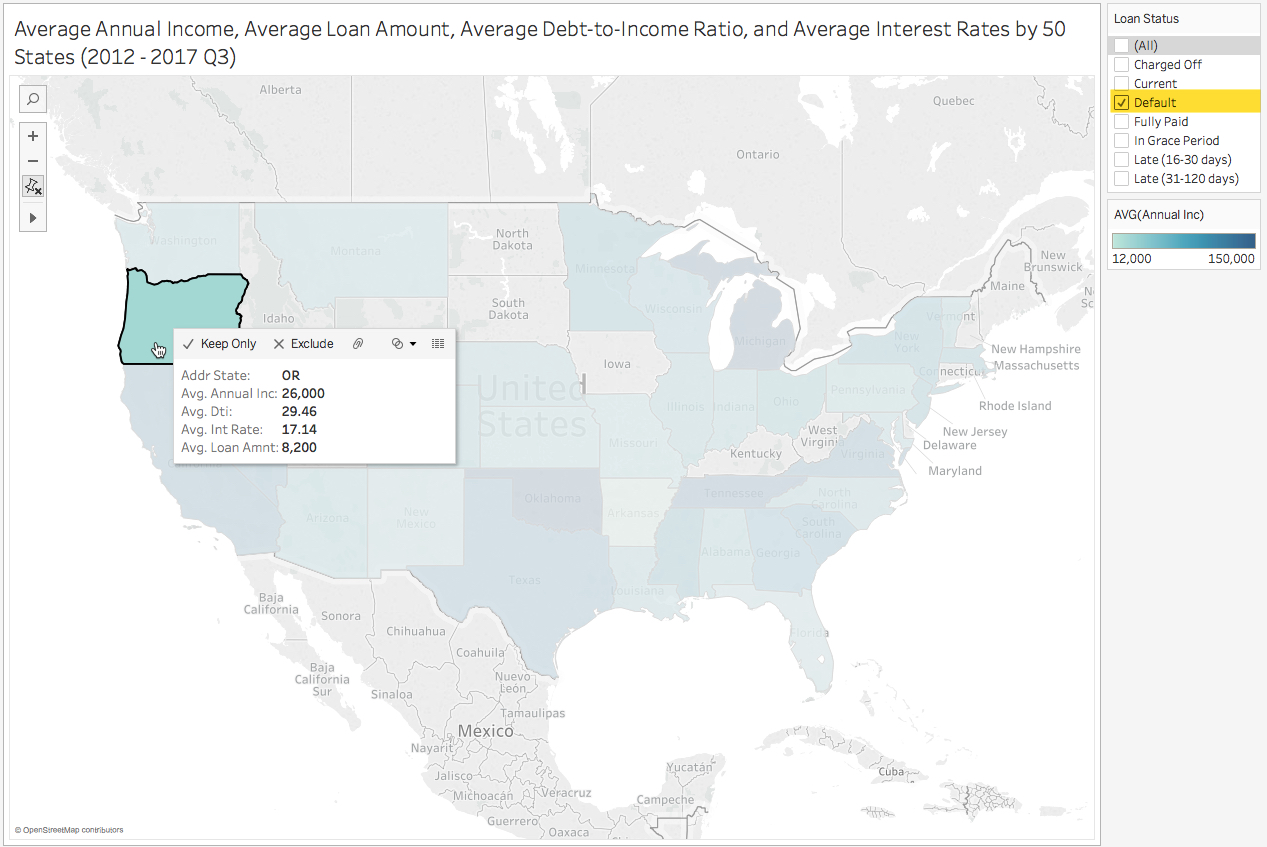

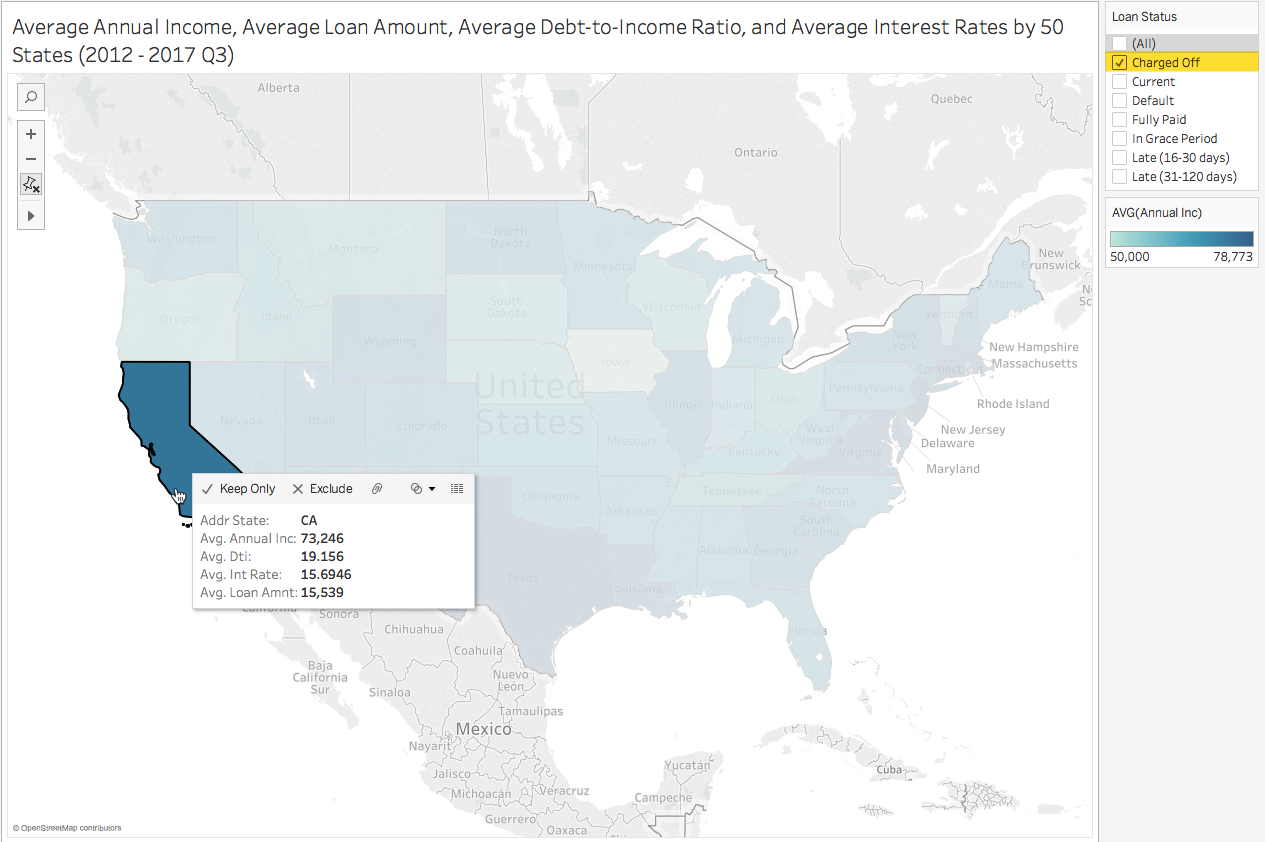